# КЛАСИФІКАЦІЯ "ВТОРИННОГО" РИНКУ ЖИТЛОВОЇ НЕРУХОМОСТІ В М.КИЇВ: PandasSQL та  Дискримінантний аналіз

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Дані по вторинному ринку житлової нерухомості в м.Київ було викачано з `Kaggle` за лінком нижче:**

- Source: https://www.kaggle.com/datasets/kirichenko17roman/kyiv-real-estate?select=class_flat.csv

In [9]:
df_real_estate = pd.read_csv('../data/class_flat/class_flat.csv')

## Бліц-опис даних

In [10]:
display(df_real_estate.head(3));
display(df_real_estate.tail(3));

,id,price,price_sm,address,complex,hist_district,admin_district,city,description,rooms,area_total,area_living,area_kitchen,stock,stock_total,year,project,wall,currency,bad_proposal
0,377514444,1865470,23327,вул. Радченка,"ЖК вул. Петра Радченка, 27-29",Солом'янка,Солом'янський,Київ,БЕЗ КОМИССИИ!!! Видовая 3К квартира в новостро...,3,79.97,43.09,12.68,5,25.0,NaN,NaN,монолітно-каркасний,UAH,0
1,381003995,90000,732,"вул. Бориспільська, 34",NaN,Нова Дарниця,Дарницький,Київ,Продается 5- комн квартира ул Бориспольськая 3...,5,123.00,71.20,16.60,3,16.0,1989.0,серія КТ,утеплена панель,USD,0
2,379779512,330000,3000,"Лабораторний пров., 7",ЖК Alter Ego,Черепанова гора,Печерський,Київ,"БЕЗ КОМИССИИ для покупателя, предложение от со...",3,110.00,60.00,40.00,18,24.0,2018.0,спец. проект,монолітно-каркасний,USD,0


,id,price,price_sm,address,complex,hist_district,admin_district,city,description,rooms,area_total,area_living,area_kitchen,stock,stock_total,year,project,wall,currency,bad_proposal
14063,380441567,60000,1224,"вул. Сверстюка (Марини Раскової), 6",ЖК Галактика,Лівобережний масив,Дніпровський,Київ,Однокомнатная квартира в современном ЖК Галакт...,1,49.0,17.0,16.0,16,25.0,2019.0,спец. проект,монолітно-каркасний,USD,0
14064,379610206,240000,2051,"вул. Тютюнника (Анрі Барбюса), 28а",ЖК Cardinal,Нова забудова,Печерський,Київ,"Центр. м.Олимпийская. ул. В. Тютюнника, 28-А. ...",3,117.0,75.0,26.0,8,25.0,2019.0,спец. проект,монолітно-каркасний,USD,0
14065,380741392,168000,2754,"вул. Драгомирова, 4б",ЖК Delmar,Чорна Гора,Печерський,Київ,Печерский район Новопечерские Липки ЖК «Дельма...,2,61.0,20.0,25.0,30,34.0,2019.0,спец. проект,монолітно-каркасний,USD,0


In [11]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14066 entries, 0 to 14065
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              14066 non-null  int64  
 1   price           14066 non-null  int64  
 2   price_sm        14066 non-null  int64  
 3   address         14066 non-null  object 
 4   complex         7954 non-null   object 
 5   hist_district   13975 non-null  object 
 6   admin_district  14066 non-null  object 
 7   city            14064 non-null  object 
 8   description     13997 non-null  object 
 9   rooms           14066 non-null  int64  
 10  area_total      14066 non-null  float64
 11  area_living     11443 non-null  float64
 12  area_kitchen    12171 non-null  float64
 13  stock           14066 non-null  int64  
 14  stock_total     13861 non-null  float64
 15  year            12815 non-null  float64
 16  project         13066 non-null  object 
 17  wall            13627 non-null 

In [12]:
df_real_estate.dtypes.value_counts()

object     9
int64      6
float64    5
dtype: int64

In [13]:
df_real_estate.shape
print(f'Набір даних містить {df_real_estate.shape[0]} рядків та {df_real_estate.shape[1]} колонок.')

Набір даних містить 14066 рядків та 20 колонок.


In [14]:
df_real_estate.describe()

,id,price,price_sm,rooms,area_total,area_living,area_kitchen,stock,stock_total,year,bad_proposal
count,1.406600e+04,1.406600e+04,14066.000000,14066.000000,14066.000000,11443.000000,12171.000000,14066.000000,13861.000000,12815.000000,14066.000000
mean,3.782737e+08,2.832450e+05,2793.730627,2.365989,85.486388,44.149313,15.588783,9.430684,16.998846,1998.824112,0.107707
std,6.053666e+06,1.275563e+06,7939.544947,1.134468,58.406175,32.397609,10.128905,6.841130,7.993603,25.669891,0.310020
min,3.475628e+07,1.750000e+04,125.000000,1.000000,13.000000,0.010000,1.000000,1.000000,1.000000,1857.000000,0.000000
25%,3.776323e+08,6.700000e+04,1131.000000,1.000000,51.000000,23.600000,9.000000,4.000000,9.000000,1987.000000,0.000000
50%,3.799594e+08,1.040000e+05,1518.000000,2.000000,71.000000,38.000000,13.000000,8.000000,16.000000,2010.000000,0.000000
75%,3.807864e+08,1.974500e+05,2258.750000,3.000000,98.000000,53.000000,18.950000,14.000000,25.000000,2017.000000,0.000000
max,3.811202e+08,8.370000e+07,341633.000000,18.000000,1000.000000,450.000000,215.000000,117.000000,55.000000,2022.000000,1.000000


In [15]:
df_real_estate.loc[df_real_estate['year'].idxmax()]

id                                                        377977190
price                                                         70000
price_sm                                                       1077
address                            вул. Сверстюка (Марини Раскової)
complex                                                         NaN
hist_district                                                   NaN
admin_district                                         Дніпровський
city                                                           Київ
description       Продается квартира в ЖК Rusaniv Residence в 4 ...
rooms                                                             2
area_total                                                     65.0
area_living                                                    45.0
area_kitchen                                                   16.0
stock                                                            22
stock_total                                     

In [16]:
df_real_estate.loc[df_real_estate['year'].idxmin()]

id                                                        380971287
price                                                        330000
price_sm                                                       3173
address                                      вул. В. Житомирська, 4
complex                                                         NaN
hist_district                                           Старий Київ
admin_district                                       Шевченківський
city                                                           Київ
description       Продается квартира в самом центре Киева, возле...
rooms                                                             3
area_total                                                    104.0
area_living                                                     NaN
area_kitchen                                                    NaN
stock                                                             2
stock_total                                     

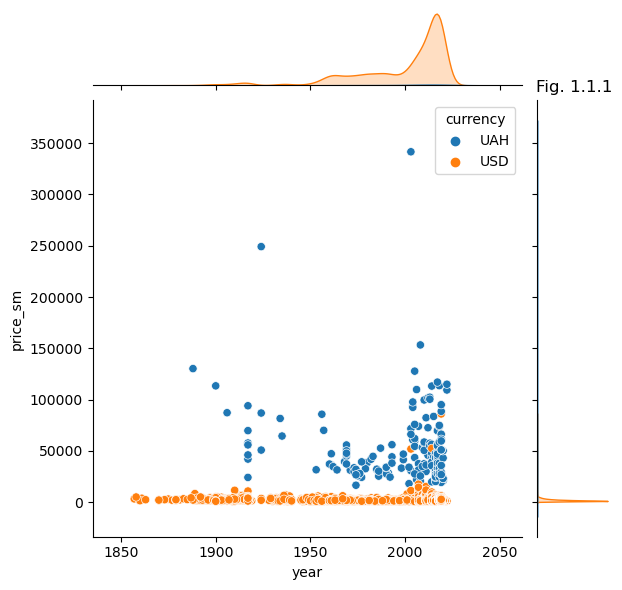

In [17]:
sns.jointplot(data=df_real_estate, x="year", y="price_sm", hue="currency")
plt.title("Fig. 1.1.1");

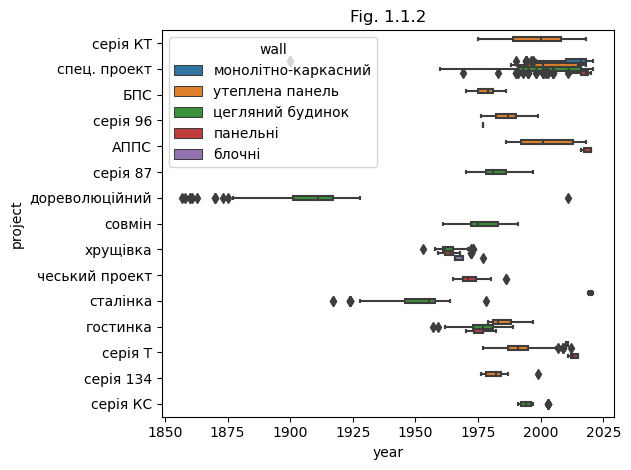

In [18]:
sns.boxplot(data=df_real_estate, 
            x="year", 
            y="project", 
            hue="wall")
plt.title("Fig. 1.1.2")
plt.tight_layout();

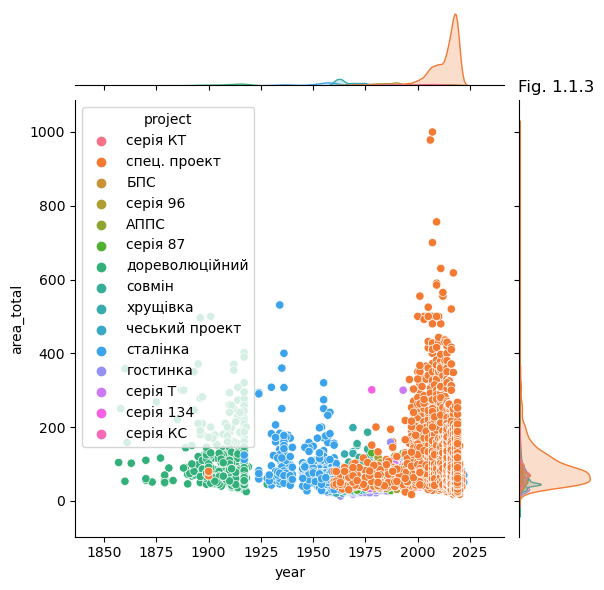

In [19]:
sns.jointplot(data=df_real_estate, x="year", y="area_total", hue="project")
plt.title("Fig. 1.1.3");

In [20]:
df_real_estate[['currency', 'admin_district']].value_counts()

currency  admin_district
USD       Печерський        3009
          Дарницький        1972
          Голосіївський     1660
          Шевченківський    1386
          Дніпровський      1266
          Солом'янський     1094
          Подільський       1011
          Оболонський        906
          Святошинський      753
          Деснянський        706
UAH       Печерський          42
          Голосіївський       41
          Шевченківський      40
          Дарницький          38
          Дніпровський        31
          Солом'янський       29
          Оболонський         28
          Подільський         27
          Святошинський       12
          Деснянський          6
USD       Печерськ             3
          Київ                 2
          Деміївка             1
          ЖК Мега-сіті         1
          Караваєві Дачі       1
          Нивки                1
dtype: int64

In [21]:
df_real_estate['year'].value_counts()

2019.0    1344
2018.0    1109
2017.0    1094
2014.0     644
2016.0     573
          ... 
1891.0       1
1875.0       1
1877.0       1
1861.0       1
1881.0       1
Name: year, Length: 137, dtype: int64

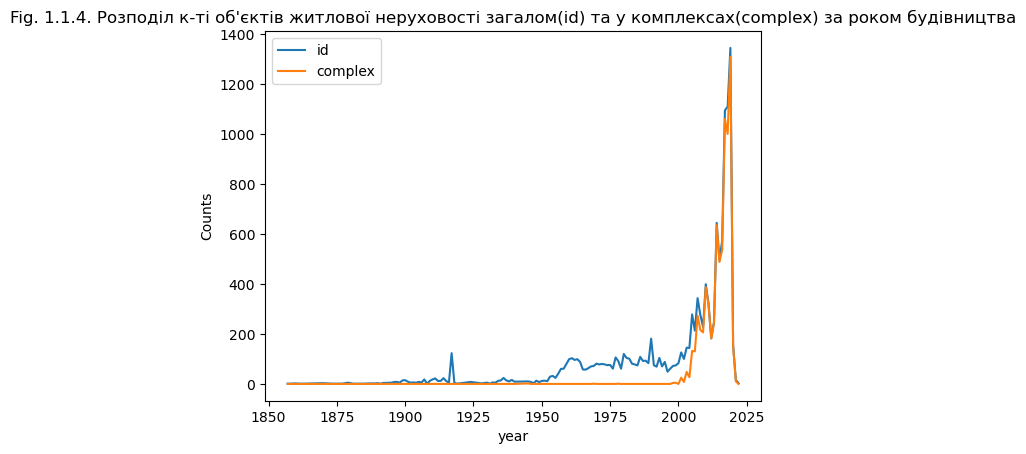

In [22]:
(
    df_real_estate
    .groupby('year')
    ['id']
    .count()
).plot()
plt.ylabel("Counts")

(
    df_real_estate
    .groupby('year')
    ['complex']
    .count()
).plot()
plt.ylabel("Counts")
plt.title("Fig. 1.1.4. Розподіл к-ті об'єктів житлової неруховості загалом(id) та у комплексах(complex) за роком будівництва")
plt.legend();

**Висновки щодо описової статистики досліджуваних даних:**

- Дослідник, що розмістив дані у сфоєму профілі на **Kaggle** [https://www.kaggle.com/datasets/kirichenko17roman/kyiv-real-estate] напарсив дані про продаж житлової нерухомості в Києві з **Flatfy** [https://flatfy.ua/uk].

- Всього база даних містить понад `14 тис. об'єктів` вторинної житлової нерухомості.

- Масимальний рік побудови житла в оголошення про продаж вторинної житлової нерухомості датується `2022 роком`, а мінімальний - `1857 рік`.

- Відсутня уніфікована валюта для цін на вторинну житлову нерухомість (є як **UAH**, так і **USD**), що унеможливлює коректне порівняння різних квартир між собою і спотворює *`descriptive statistics`* таких ознак як **price** (ціна) та **price_sm** (ціна за квадратний метр).

- Є проблеми із неправильним заповненням колонок. Наприклад, в колонці **admin_district**, де по суті мають бути лише 10 адміністративних районів Києва, є декілька нерелевантних значень - *`Печерськ, Київ, Деміївка, ЖК Мега-сіті, Караваєві Дачі, Нивки`*.

- Найбільша к-ть об'єктів виставленої на продаж вторинної житлової нерухомості зосереджена у житлових комплексах (**див. fig. 1.1.4**). 

>**КЛЮЧОВА ЗАДАЧА - ПРОКЛАСИФІКУВАТИ КОЖЕН ОБ'ЄКТ ВТОРИННОЇ ЖИТЛОВОЇ НЕРУХОМОСТІ КИЄВА 
ЗА КЛАСОМ ЖИТЛА В СИЛУ ВІДСУТНОСТІ ТАКОГО РОДУ КЛАСИФІКАЦІЇ**

>**ОЧІКУВАНИЙ БІЗНЕС-ЕФЕКТ ВІД РОЗВ'ЯЗАННЯ ВИЩЕЗАЗНАЧЕНОЇ ЗАДАЧИ:
ДОПОМОГТИ ПОТЕНЦІЙНОМУ ПОКУПЦЮ ВІДНАЙТИ ТОЙ ОБ'ЄКТ ВТОРИННОЇ ЖИТЛОВОЇ НЕРУХОМОСТІ НА САЙТІ [`Flatfy`](https://flatfy.ua/uk/search?geo_id=1&section_id=1), ЩО ВІДПОВІДАВ БИ ОЧІКУВАНОМУ ЖИТЛОВОМУ КЛАСУ**

## Опрацювання даних за допомогою PandasSQL

In [23]:
! pip install pandasql

In [24]:
from pandasql import sqldf

### Відтворимо за допомогою sql-запиту команду `df_real_estate.head(3)`

In [25]:
q = "SELECT * FROM df_real_estate LIMIT 3"
sqldf(q, globals())

,id,price,price_sm,address,complex,hist_district,admin_district,city,description,rooms,area_total,area_living,area_kitchen,stock,stock_total,year,project,wall,currency,bad_proposal
0,377514444,1865470,23327,вул. Радченка,"ЖК вул. Петра Радченка, 27-29",Солом'янка,Солом'янський,Київ,БЕЗ КОМИССИИ!!! Видовая 3К квартира в новостро...,3,79.97,43.09,12.68,5,25.0,NaN,None,монолітно-каркасний,UAH,0
1,381003995,90000,732,"вул. Бориспільська, 34",None,Нова Дарниця,Дарницький,Київ,Продается 5- комн квартира ул Бориспольськая 3...,5,123.00,71.20,16.60,3,16.0,1989.0,серія КТ,утеплена панель,USD,0
2,379779512,330000,3000,"Лабораторний пров., 7",ЖК Alter Ego,Черепанова гора,Печерський,Київ,"БЕЗ КОМИССИИ для покупателя, предложение от со...",3,110.00,60.00,40.00,18,24.0,2018.0,спец. проект,монолітно-каркасний,USD,0


### Створимо шаблон виконання sql-запитів для зручності подальшого використання

In [21]:
pysqldf = lambda q: sqldf(q, globals())

**Перевірка (виконаємо 3 довільні запити):**

In [22]:
q = """
SELECT admin_district
    ,SUM(price_sm_USD)/COUNT(price_sm_USD) AS mean_price_sm_USD
FROM
    (
    SELECT *
        ,price_sm / 35 AS price_sm_USD
    FROM df_real_estate 
    WHERE currency ='UAH'
    ) AS TEMP
GROUP BY admin_district
"""
pysqldf(q)

,admin_district,mean_price_sm_USD
0,Голосіївський,1360
1,Дарницький,856
2,Деснянський,797
3,Дніпровський,935
4,Оболонський,1211
5,Печерський,2065
6,Подільський,975
7,Святошинський,823
8,Солом'янський,921
9,Шевченківський,1884


In [23]:
q = """
SELECT *
FROM df_real_estate
WHERE complex <> 'None'
"""
pysqldf(q)

,id,price,price_sm,address,complex,hist_district,admin_district,city,description,rooms,area_total,area_living,area_kitchen,stock,stock_total,year,project,wall,currency,bad_proposal
0,377514444,1865470,23327,вул. Радченка,"ЖК вул. Петра Радченка, 27-29",Солом'янка,Солом'янський,Київ,БЕЗ КОМИССИИ!!! Видовая 3К квартира в новостро...,3,79.97,43.09,12.68,5,25.0,NaN,None,монолітно-каркасний,UAH,0
1,379779512,330000,3000,"Лабораторний пров., 7",ЖК Alter Ego,Черепанова гора,Печерський,Київ,"БЕЗ КОМИССИИ для покупателя, предложение от со...",3,110.00,60.00,40.00,18,24.0,2018.0,спец. проект,монолітно-каркасний,USD,0
2,381000164,235000,3133,просп. Героїв Сталінграда,ЖК Оазис,Оболонь,Оболонський,Київ,"Пр. Героев Сталинграда, 2г. ЖК Оазис. 11/24эт....",3,75.00,45.00,15.00,11,24.0,2008.0,None,цегляний будинок,USD,0
3,380881846,260000,1883,вул. Річкова,"ЖК вул. Річна, 4",Лук'янівка,Шевченківський,Київ,"3 ком квартира ул Речная 4, жк бизнес класса К...",3,138.05,58.39,46.86,18,23.0,NaN,None,None,USD,0
4,381066330,75000,2885,"вул. Польова, 73","ЖК вул. Польова, 73",Караваєві Дачі,Солом'янський,Київ,Продам квартиру с новым ремонтом. Жк Караваевы...,1,26.00,NaN,26.00,20,25.0,2020.0,спец. проект,монолітно-каркасний,USD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,380131420,80000,1194,"вул. Сверстюка (Марини Раскової), 6",ЖК Галактика,Лівобережний масив,Дніпровський,Київ,Двухкомнатная квартира в современном ЖК Галакт...,2,67.00,31.00,23.00,25,25.0,2019.0,спец. проект,монолітно-каркасний,USD,0
7950,380131557,58000,1318,"вул. Сверстюка (Марини Раскової), 6",ЖК Галактика,Лівобережний масив,Дніпровський,Київ,Однокомнатная квартира в современном ЖК Галакт...,1,44.00,14.00,16.00,17,25.0,2019.0,спец. проект,монолітно-каркасний,USD,0
7951,380441567,60000,1224,"вул. Сверстюка (Марини Раскової), 6",ЖК Галактика,Лівобережний масив,Дніпровський,Київ,Однокомнатная квартира в современном ЖК Галакт...,1,49.00,17.00,16.00,16,25.0,2019.0,спец. проект,монолітно-каркасний,USD,0
7952,379610206,240000,2051,"вул. Тютюнника (Анрі Барбюса), 28а",ЖК Cardinal,Нова забудова,Печерський,Київ,"Центр. м.Олимпийская. ул. В. Тютюнника, 28-А. ...",3,117.00,75.00,26.00,8,25.0,2019.0,спец. проект,монолітно-каркасний,USD,0


In [24]:
q = """
SELECT SUM(num_housing) AS Total_num_housing_until2010
FROM
    (
    SELECT complex
        ,COUNT(*) AS num_housing
    FROM df_real_estate
    WHERE complex <> 'None'
    GROUP BY complex
    HAVING year <2010
    ORDER BY num_housing DESC
    ) AS TEMP
"""
pysqldf(q)

,Total_num_housing_until2010
0,1056


In [25]:
q = """
SELECT SUM(num_housing) AS Total_num_housing
FROM
    (
    SELECT complex
        ,COUNT(*) AS num_housing
    FROM df_real_estate
    WHERE complex <> 'None'
    GROUP BY complex
    ORDER BY num_housing DESC
    ) AS TEMP
"""
pysqldf(q)

,Total_num_housing
0,7954


**Запити повертають правильні результати, тому виконання шаблону можна вважати успішним!**



### Підготовка ("очищення" та трансформація) даних за домоиогою PandasSQL для використання методу статистичної класифікації

>**ПРОБЛЕМА №1 ("UAH vs USD"):**
Достименно невідомо станом на яку дату було запарсино **`df_real_estate`**. Однак відомо, що є об'яви про продаж житлової нерухомості за 2022 рік (`див. вище п.1.1`). Тому, щоб перевести **UAH** в **USD** ми використаємо курс станом на червень 2022 року: **`1 USD = 35 UAH`** /середній курс в банках при купівлі/ (за даними Мінфін [https://minfin.com.ua/ua/currency/2022-06-01/]).

In [26]:
q = """
SELECT *
    ,(CASE WHEN currency = 'UAH' THEN price / 35 ELSE price * 1 END) AS price_USD
    ,(CASE WHEN currency = 'UAH' THEN price_sm / 35 ELSE price_sm * 1 END) AS price_sm_USD
FROM df_real_estate

"""
res_df1 = pysqldf(q)

In [27]:
res_df1

,id,price,price_sm,address,complex,hist_district,admin_district,city,description,rooms,...,area_kitchen,stock,stock_total,year,project,wall,currency,bad_proposal,price_USD,price_sm_USD
0,377514444,1865470,23327,вул. Радченка,"ЖК вул. Петра Радченка, 27-29",Солом'янка,Солом'янський,Київ,БЕЗ КОМИССИИ!!! Видовая 3К квартира в новостро...,3,...,12.68,5,25.0,NaN,None,монолітно-каркасний,UAH,0,53299,666
1,381003995,90000,732,"вул. Бориспільська, 34",None,Нова Дарниця,Дарницький,Київ,Продается 5- комн квартира ул Бориспольськая 3...,5,...,16.60,3,16.0,1989.0,серія КТ,утеплена панель,USD,0,90000,732
2,379779512,330000,3000,"Лабораторний пров., 7",ЖК Alter Ego,Черепанова гора,Печерський,Київ,"БЕЗ КОМИССИИ для покупателя, предложение от со...",3,...,40.00,18,24.0,2018.0,спец. проект,монолітно-каркасний,USD,0,330000,3000
3,379989748,82000,1367,"вул. Миколи Голего (Лєбєдева-Кумача), 5",None,Караваєві Дачі,Солом'янський,Київ,Продается просторная однокомнатная квартира! Р...,1,...,23.00,10,17.0,2005.0,спец. проект,цегляний будинок,USD,0,82000,1367
4,381009891,42000,1091,"вул. Ніколаєва, 9а",None,Троєщина,Деснянський,Київ,Продам 1к квартиру в Деснянском р-не по ул.Ник...,1,...,8.40,13,16.0,1986.0,серія КТ,утеплена панель,USD,0,42000,1091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14061,380131420,80000,1194,"вул. Сверстюка (Марини Раскової), 6",ЖК Галактика,Лівобережний масив,Дніпровський,Київ,Двухкомнатная квартира в современном ЖК Галакт...,2,...,23.00,25,25.0,2019.0,спец. проект,монолітно-каркасний,USD,0,80000,1194
14062,380131557,58000,1318,"вул. Сверстюка (Марини Раскової), 6",ЖК Галактика,Лівобережний масив,Дніпровський,Київ,Однокомнатная квартира в современном ЖК Галакт...,1,...,16.00,17,25.0,2019.0,спец. проект,монолітно-каркасний,USD,0,58000,1318
14063,380441567,60000,1224,"вул. Сверстюка (Марини Раскової), 6",ЖК Галактика,Лівобережний масив,Дніпровський,Київ,Однокомнатная квартира в современном ЖК Галакт...,1,...,16.00,16,25.0,2019.0,спец. проект,монолітно-каркасний,USD,0,60000,1224
14064,379610206,240000,2051,"вул. Тютюнника (Анрі Барбюса), 28а",ЖК Cardinal,Нова забудова,Печерський,Київ,"Центр. м.Олимпийская. ул. В. Тютюнника, 28-А. ...",3,...,26.00,8,25.0,2019.0,спец. проект,монолітно-каркасний,USD,0,240000,2051


In [28]:
res_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14066 entries, 0 to 14065
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              14066 non-null  int64  
 1   price           14066 non-null  int64  
 2   price_sm        14066 non-null  int64  
 3   address         14066 non-null  object 
 4   complex         7954 non-null   object 
 5   hist_district   13975 non-null  object 
 6   admin_district  14066 non-null  object 
 7   city            14064 non-null  object 
 8   description     13997 non-null  object 
 9   rooms           14066 non-null  int64  
 10  area_total      14066 non-null  float64
 11  area_living     11443 non-null  float64
 12  area_kitchen    12171 non-null  float64
 13  stock           14066 non-null  int64  
 14  stock_total     13861 non-null  float64
 15  year            12815 non-null  float64
 16  project         13066 non-null  object 
 17  wall            13627 non-null 

**Трохи "почистимо" дані та усунемо інформаційну перевантаженість даних:**

In [29]:
q = """
SELECT complex
    ,hist_district
    ,admin_district
    ,city
    ,rooms
    ,area_total
    ,area_living
    ,area_kitchen
    ,year
    ,wall
    ,project
    ,price_USD
    ,price_sm_USD
FROM res_df1
WHERE city ='Київ' AND admin_district IN ("Голосіївський", "Дарницький", "Деснянський", "Дніпровський", "Оболонський", "Печерський", "Подільський", "Святошинський", "Солом'янський", "Шевченківський") 
ORDER BY admin_district ASC, year DESC"""
res_df2 = pysqldf(q)

In [30]:
res_df2

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,year,wall,project,price_USD,price_sm_USD
0,None,None,Голосіївський,Київ,3,75.00,40.00,13.0,2021.0,монолітно-каркасний,спец. проект,62900,839
1,None,None,Голосіївський,Київ,2,62.21,29.00,12.4,2021.0,монолітно-каркасний,спец. проект,51000,820
2,ЖК West House,Деміївка,Голосіївський,Київ,1,48.00,15.00,12.0,2021.0,цегляний будинок,спец. проект,65000,1354
3,"ЖК Метрополіс (вул. Академіка Заболотного, 1)",Теремки-1,Голосіївський,Київ,1,43.00,13.00,19.0,2020.0,None,None,67350,1566
4,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.00,83.90,29.6,2020.0,монолітно-каркасний,спец. проект,183080,1228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14052,None,Сирець,Шевченківський,Київ,2,49.00,28.00,8.0,NaN,None,сталінка,52000,1061
14053,ЖК Resident Concept House,Історичний центр,Шевченківський,Київ,3,108.00,60.00,17.0,NaN,None,сталінка,270000,2500
14054,ЖК Файна Таун,Нивки,Шевченківський,Київ,2,50.00,20.70,15.6,NaN,панельні,спец. проект,135000,2700
14055,ЖК Mirax,Лук'янівка,Шевченківський,Київ,2,75.80,16.10,34.1,NaN,утеплена панель,спец. проект,95000,1253


In [31]:
q = """
SELECT complex
    ,hist_district
    ,admin_district
    ,city
    ,rooms
    ,area_total
    ,area_living
    ,area_kitchen
    ,year
    ,wall
    ,project
    ,price_USD
    ,price_sm_USD
FROM res_df1
WHERE city ='Київ' AND price_sm_USD > 1100 AND admin_district IN ("Голосіївський", "Дарницький", "Деснянський", "Дніпровський", "Оболонський", "Печерський", "Подільський", "Святошинський", "Солом'янський", "Шевченківський") 
ORDER BY admin_district ASC, year DESC"""
pysqldf(q)

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,year,wall,project,price_USD,price_sm_USD
0,ЖК West House,Деміївка,Голосіївський,Київ,1,48.00,15.00,12.0,2021.0,цегляний будинок,спец. проект,65000,1354
1,"ЖК Метрополіс (вул. Академіка Заболотного, 1)",Теремки-1,Голосіївський,Київ,1,43.00,13.00,19.0,2020.0,None,None,67350,1566
2,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.00,83.90,29.6,2020.0,монолітно-каркасний,спец. проект,183080,1228
3,ЖК Respublika,Теремки,Голосіївський,Київ,1,38.00,10.00,13.0,2020.0,монолітно-каркасний,спец. проект,78000,2053
4,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.00,98.00,15.0,2020.0,монолітно-каркасний,спец. проект,229900,1543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10671,None,Сирець,Шевченківський,Київ,3,64.00,43.00,7.0,NaN,цегляний будинок,сталінка,75000,1172
10672,ЖК Resident Concept House,Історичний центр,Шевченківський,Київ,3,108.00,60.00,17.0,NaN,None,сталінка,270000,2500
10673,ЖК Файна Таун,Нивки,Шевченківський,Київ,2,50.00,20.70,15.6,NaN,панельні,спец. проект,135000,2700
10674,ЖК Mirax,Лук'янівка,Шевченківський,Київ,2,75.80,16.10,34.1,NaN,утеплена панель,спец. проект,95000,1253


In [32]:
q = """
SELECT SUM(num_housing) AS Total_num_housing_since2010
FROM
    (
    SELECT complex
        ,COUNT(*) AS num_housing
    FROM df_real_estate
    WHERE complex <> 'None'
    GROUP BY complex
    HAVING year >=2010
    ORDER BY num_housing DESC
    ) AS TEMP
"""
pysqldf(q)

,Total_num_housing_since2010
0,5523


**ПРОБЛЕМА №2:** None - це велика частина наявних даних, а ми хочемо прокласифікувати все житло. Тому, спочатку прокласифікуємо наяві комплекси за такими типами: `економ-клас`, `комфорт-клас`, `бізнес-клас` та `преміум-клас` - для новобудов (див. **Fig. 1.2.2.1.**). На жаль, не вдалось знайти житлові класи для вторинного ринку житла, тому ми будемо використовувати зазначені вище класи з певною модифікацією (див. нижче). Використання назв цих класів обумовлено тим, що понад 5,5 тис. пропозицій купівлі об'єктів вторинного ринку житла в Києві становлять об'єкти у житлових комплексах, які побудовані після 2010 року включно.

Для зручності розрахунків спочатку розрахуємо в **UAH** та зробимо трохи модифікуємо діапазони цін (на бл. +50% від середньої вартості житла як ймовірні ремонтні витрати (+ до уваги брались дані з **Fig. 1.2.2.2.**), оскільки в нас дані по вторинному ринку нерухомості (станом на червень 2022 року)):

- `економ-клас`  <= **29.000** + 14.500 = 43.500 UAH/sm 
- `комфорт-клас` <= **37.100** + 18.550 = 55.650 UAH/sm
- `бізнес-клас`   <= **56.900** + 28.450 = 85.350 UAH/sm
- `преміум-клас` >  **56.900** + 28.450 = 85.350 UAH/sm

Модифікована класифікація вторинної житлової нерухомості за вартістю житла переводимо в **USD (1 USD = 35 UAH)**:

- `економ-клас`  <= 43.500 / 35 = 1.243 USD/sm (*з поправкою на плаваючий курс валют*) <= **1.200 USD/sm**
- `комфорт-клас` <= 55.650 / 35 = 1.590 USD/sm (*з поправкою на плаваючий курс валют*) <= **1.600 USD/sm**
- `бізнес-клас`   <= 85.350 / 35 = 2.439 USD/sm (*з поправкою на плаваючий курс валют*) <= **2.500 USD/sm**
- `преміум-клас`  >  85.350 / 35 = 2.439 USD/sm (*з поправкою на плаваючий курс валют*) > **2.500 USD/sm**

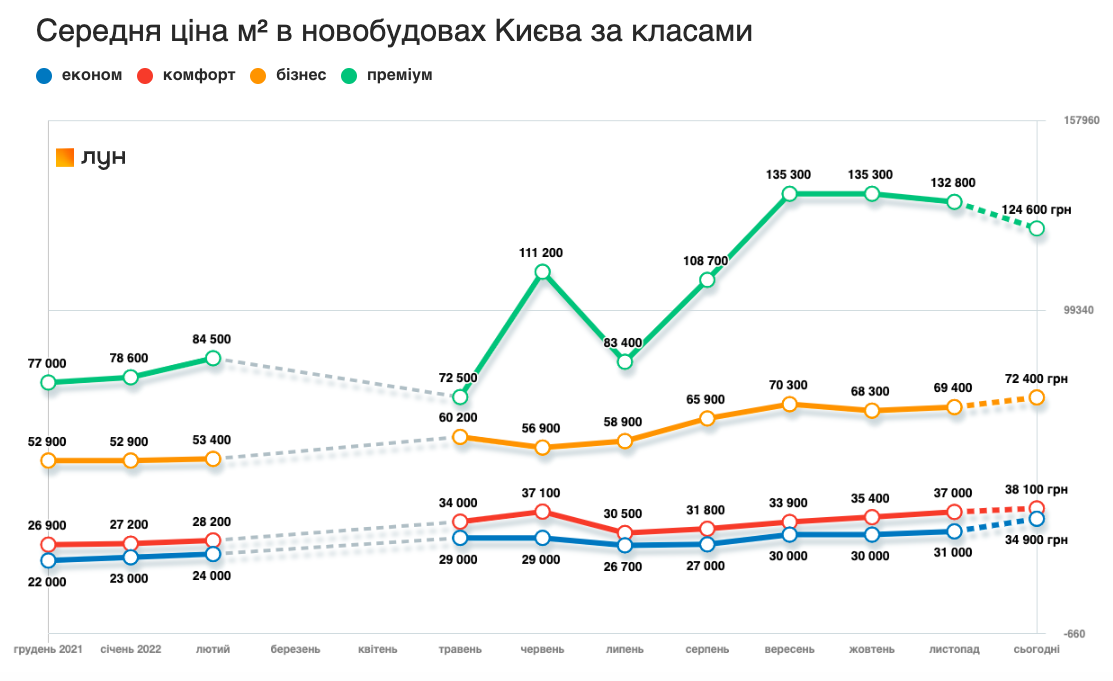

**Fig. 1.2.2.1.** Динаміка середньої ціни за кв.м в новобудовах Києва за класами 
(**Source:** [https://misto.lun.ua/price])

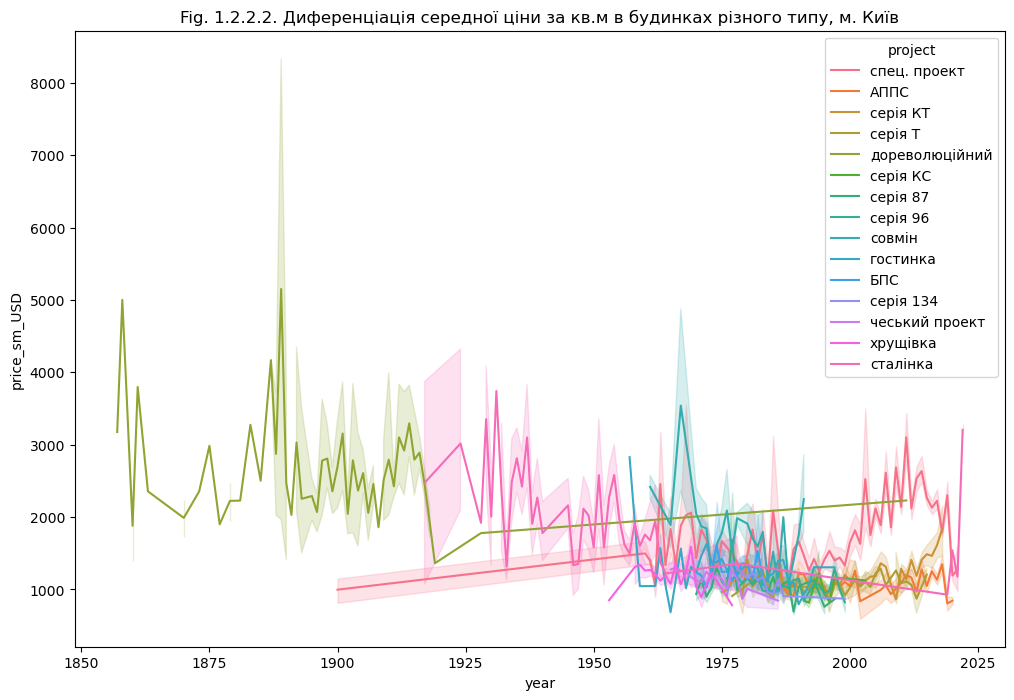

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = res_df2, 
             x="year", 
             y="price_sm_USD", 
             hue = 'project')
plt.title('Fig. 1.2.2.2. Диференціація середної ціни за кв.м в будинках різного типу, м. Київ');

**Визначаємо клас житла у різних житлових комплексах Києва за значенням середньої вартості кв.метру в кожному комплексі**

In [34]:
q = """
SELECT *
    ,(CASE 
        WHEN mean_complex_sm_USD <= 1200 THEN 'економ-клас' 
        WHEN mean_complex_sm_USD <= 1600 THEN 'комфорт-клас'
        WHEN mean_complex_sm_USD <= 2500 THEN 'бізнес-клас'
        ELSE 'преміум-клас' END
        
    ) AS housing_class_by_complex
FROM(
    SELECT complex
        ,hist_district
        ,year
        ,COUNT(*) AS num_flat
        ,rooms
        ,SUM(price_sm_USD)/COUNT(price_sm_USD) AS mean_complex_sm_USD
    FROM res_df2
    GROUP BY complex
    HAVING complex <> 'None'
    ORDER BY num_flat DESC, year ASC
    ) AS TEMP
"""
df_complex = pysqldf(q)
df_complex

,complex,hist_district,year,num_flat,rooms,mean_complex_sm_USD,housing_class_by_complex
0,ЖК Новопечерські Липки,Чорна Гора,2016.0,454,3,3648,преміум-клас
1,ЖК Французький квартал 2,Нова забудова,2019.0,294,1,2827,преміум-клас
2,"ЖК вул. Каховська, 60",Микільська Слобідка,2020.0,252,1,1285,комфорт-клас
3,Варшавський Мікрорайон,Виноградар,2019.0,228,1,1246,комфорт-клас
4,ЖК Бульвар Фонтанів,Нижній Печерськ,2019.0,195,1,3668,преміум-клас
...,...,...,...,...,...,...,...
561,ЖК Солом'янський,Олександрівська Слобідка,2019.0,1,1,1500,комфорт-клас
562,ЖК Greenville Park,Кудрявець,2020.0,1,3,1931,бізнес-клас
563,"ЖК вул. Дмитрівська, 60/19",Солдатська слобідка,2020.0,1,2,1636,бізнес-клас
564,ЖК West House,Деміївка,2021.0,1,1,1354,комфорт-клас


In [35]:
df_complex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   complex                   566 non-null    object 
 1   hist_district             566 non-null    object 
 2   year                      502 non-null    float64
 3   num_flat                  566 non-null    int64  
 4   rooms                     566 non-null    int64  
 5   mean_complex_sm_USD       566 non-null    int64  
 6   housing_class_by_complex  566 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 31.1+ KB


In [36]:
df_complex.housing_class_by_complex.value_counts()

бізнес-клас     187
комфорт-клас    162
економ-клас     130
преміум-клас     87
Name: housing_class_by_complex, dtype: int64

**Поєднуємо результати класифікації житлових комплексів з іншими записами у res_df2**

In [37]:
q = """
SELECT rdf.*
    ,dfc.mean_complex_sm_USD
    ,dfc.housing_class_by_complex
FROM res_df2 AS rdf LEFT JOIN df_complex AS dfc ON rdf.complex = dfc.complex
"""
df_all_housing = pysqldf(q)
df_all_housing

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,year,wall,project,price_USD,price_sm_USD,mean_complex_sm_USD,housing_class_by_complex
0,None,None,Голосіївський,Київ,3,75.00,40.00,13.0,2021.0,монолітно-каркасний,спец. проект,62900,839,NaN,None
1,None,None,Голосіївський,Київ,2,62.21,29.00,12.4,2021.0,монолітно-каркасний,спец. проект,51000,820,NaN,None
2,ЖК West House,Деміївка,Голосіївський,Київ,1,48.00,15.00,12.0,2021.0,цегляний будинок,спец. проект,65000,1354,1354.0,комфорт-клас
3,"ЖК Метрополіс (вул. Академіка Заболотного, 1)",Теремки-1,Голосіївський,Київ,1,43.00,13.00,19.0,2020.0,None,None,67350,1566,1322.0,комфорт-клас
4,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.00,83.90,29.6,2020.0,монолітно-каркасний,спец. проект,183080,1228,1979.0,бізнес-клас
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14052,None,Сирець,Шевченківський,Київ,2,49.00,28.00,8.0,NaN,None,сталінка,52000,1061,NaN,None
14053,ЖК Resident Concept House,Історичний центр,Шевченківський,Київ,3,108.00,60.00,17.0,NaN,None,сталінка,270000,2500,2677.0,преміум-клас
14054,ЖК Файна Таун,Нивки,Шевченківський,Київ,2,50.00,20.70,15.6,NaN,панельні,спец. проект,135000,2700,2157.0,бізнес-клас
14055,ЖК Mirax,Лук'янівка,Шевченківський,Київ,2,75.80,16.10,34.1,NaN,утеплена панель,спец. проект,95000,1253,1338.0,комфорт-клас


In [38]:
df_All_Housing = df_all_housing.dropna(subset=['rooms'
                                               , 'area_total'
                                               , 'area_living'
                                               , 'area_kitchen'
                                               , 'year'
                                               , 'price_sm_USD'], axis=0)

In [39]:
df_All_Housing

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,year,wall,project,price_USD,price_sm_USD,mean_complex_sm_USD,housing_class_by_complex
0,None,None,Голосіївський,Київ,3,75.00,40.0,13.0,2021.0,монолітно-каркасний,спец. проект,62900,839,NaN,None
1,None,None,Голосіївський,Київ,2,62.21,29.0,12.4,2021.0,монолітно-каркасний,спец. проект,51000,820,NaN,None
2,ЖК West House,Деміївка,Голосіївський,Київ,1,48.00,15.0,12.0,2021.0,цегляний будинок,спец. проект,65000,1354,1354.0,комфорт-клас
3,"ЖК Метрополіс (вул. Академіка Заболотного, 1)",Теремки-1,Голосіївський,Київ,1,43.00,13.0,19.0,2020.0,None,None,67350,1566,1322.0,комфорт-клас
4,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.00,83.9,29.6,2020.0,монолітно-каркасний,спец. проект,183080,1228,1979.0,бізнес-клас
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13901,None,Історичний центр,Шевченківський,Київ,2,60.00,34.1,9.8,1870.0,цегляний будинок,дореволюційний,120000,2000,NaN,None
13902,None,Старий Київ,Шевченківський,Київ,3,102.00,35.0,24.0,1863.0,цегляний будинок,дореволюційний,240000,2353,NaN,None
13904,None,Історичний центр,Шевченківський,Київ,2,53.00,42.0,5.0,1860.0,цегляний будинок,дореволюційний,125000,2358,NaN,None
13905,None,Історичний центр,Шевченківський,Київ,6,358.00,290.0,20.0,1860.0,цегляний будинок,дореволюційний,500000,1397,NaN,None


In [40]:
df_All_Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10293 entries, 0 to 13906
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   complex                   5592 non-null   object 
 1   hist_district             10273 non-null  object 
 2   admin_district            10293 non-null  object 
 3   city                      10293 non-null  object 
 4   rooms                     10293 non-null  int64  
 5   area_total                10293 non-null  float64
 6   area_living               10293 non-null  float64
 7   area_kitchen              10293 non-null  float64
 8   year                      10293 non-null  float64
 9   wall                      10271 non-null  object 
 10  project                   10045 non-null  object 
 11  price_USD                 10293 non-null  int64  
 12  price_sm_USD              10293 non-null  int64  
 13  mean_complex_sm_USD       5592 non-null   float64
 14  housin

**Поєднуємо результати класифікації житлових комплексів з іншими записами у res_df2 і знаходимо житловий клас кожного унікального житлового об'єкту вторинної житлової нерухомості, які локалізовані у житлових комплексах**

In [41]:
q = """
SELECT rdf.*
    ,dfc.mean_complex_sm_USD
    ,dfc.housing_class_by_complex
FROM res_df2 AS rdf RIGHT JOIN df_complex AS dfc ON rdf.complex = dfc.complex
"""
df_full_complex = pysqldf(q)
df_full_complex

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,year,wall,project,price_USD,price_sm_USD,mean_complex_sm_USD,housing_class_by_complex
0,ЖК West House,Деміївка,Голосіївський,Київ,1,48.00,15.00,12.0,2021.0,цегляний будинок,спец. проект,65000,1354,1354,комфорт-клас
1,"ЖК Метрополіс (вул. Академіка Заболотного, 1)",Теремки-1,Голосіївський,Київ,1,43.00,13.00,19.0,2020.0,None,None,67350,1566,1322,комфорт-клас
2,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.00,83.90,29.6,2020.0,монолітно-каркасний,спец. проект,183080,1228,1979,бізнес-клас
3,ЖК Respublika,Теремки,Голосіївський,Київ,1,38.00,10.00,13.0,2020.0,монолітно-каркасний,спец. проект,78000,2053,1979,бізнес-клас
4,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.00,98.00,15.0,2020.0,монолітно-каркасний,спец. проект,229900,1543,1979,бізнес-клас
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,ЖК Пасаж,Липки,Шевченківський,Київ,3,74.00,50.00,7.0,NaN,None,дореволюційний,300000,4054,2246,бізнес-клас
7950,ЖК Resident Concept House,Історичний центр,Шевченківський,Київ,3,108.00,60.00,17.0,NaN,None,сталінка,270000,2500,2677,преміум-клас
7951,ЖК Файна Таун,Нивки,Шевченківський,Київ,2,50.00,20.70,15.6,NaN,панельні,спец. проект,135000,2700,2157,бізнес-клас
7952,ЖК Mirax,Лук'янівка,Шевченківський,Київ,2,75.80,16.10,34.1,NaN,утеплена панель,спец. проект,95000,1253,1338,комфорт-клас


In [42]:
df_Full_Complex = df_full_complex.dropna(subset=['rooms'
                                                 , 'area_total'
                                                 , 'area_living'
                                                 , 'area_kitchen'
                                                 , 'year'
                                                 , 'price_sm_USD'], axis=0)

In [43]:
df_Full_Complex 

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,year,wall,project,price_USD,price_sm_USD,mean_complex_sm_USD,housing_class_by_complex
0,ЖК West House,Деміївка,Голосіївський,Київ,1,48.0,15.0,12.0,2021.0,цегляний будинок,спец. проект,65000,1354,1354,комфорт-клас
1,"ЖК Метрополіс (вул. Академіка Заболотного, 1)",Теремки-1,Голосіївський,Київ,1,43.0,13.0,19.0,2020.0,None,None,67350,1566,1322,комфорт-клас
2,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.0,83.9,29.6,2020.0,монолітно-каркасний,спец. проект,183080,1228,1979,бізнес-клас
3,ЖК Respublika,Теремки,Голосіївський,Київ,1,38.0,10.0,13.0,2020.0,монолітно-каркасний,спец. проект,78000,2053,1979,бізнес-клас
4,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.0,98.0,15.0,2020.0,монолітно-каркасний,спец. проект,229900,1543,1979,бізнес-клас
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7887,"ЖК вул. Дмитрівська, 13, 13а",Солдатська слобідка,Шевченківський,Київ,4,148.0,83.0,12.0,2001.0,монолітно-каркасний,спец. проект,285000,1926,1926,бізнес-клас
7888,"ЖК пров. Бехтеревський, 14",Кудрявець,Шевченківський,Київ,3,125.0,80.0,13.0,1998.0,цегляний будинок,спец. проект,230000,1840,1840,бізнес-клас
7889,ЖК Кирилівський гай,Татарка,Шевченківський,Київ,1,44.0,17.0,12.0,1978.0,None,сталінка,42800,973,962,економ-клас
7890,"ЖК вул. Довженка, 2",Шулявка,Шевченківський,Київ,3,65.0,46.0,7.0,1945.0,цегляний будинок,сталінка,100000,1538,1589,комфорт-клас


In [44]:
df_Full_Complex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5592 entries, 0 to 7891
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   complex                   5592 non-null   object 
 1   hist_district             5592 non-null   object 
 2   admin_district            5592 non-null   object 
 3   city                      5592 non-null   object 
 4   rooms                     5592 non-null   int64  
 5   area_total                5592 non-null   float64
 6   area_living               5592 non-null   float64
 7   area_kitchen              5592 non-null   float64
 8   year                      5592 non-null   float64
 9   wall                      5576 non-null   object 
 10  project                   5534 non-null   object 
 11  price_USD                 5592 non-null   int64  
 12  price_sm_USD              5592 non-null   int64  
 13  mean_complex_sm_USD       5592 non-null   int64  
 14  housing_

In [45]:
df_Full_Complex.housing_class_by_complex.value_counts()

бізнес-клас     1803
комфорт-клас    1669
преміум-клас    1426
економ-клас      694
Name: housing_class_by_complex, dtype: int64

>**Знаючи класи житлових об'єктів у житлових комплексах (див. df_Full_Complex) ми можемо знайти житлові класи інших житлових об'єктів (позакомплексами) використовуючи дискримінантний аналіз.**

## Лінійний дискримінантний аналіз: пошук приналежності об'єктів вторинного ринку житла до певних житлових класів за допомогою емпіричних класифікаціних функцій

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets

In [47]:
import warnings

warnings.filterwarnings('ignore')

In [48]:
df_Full_Complex.head(1)

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,year,wall,project,price_USD,price_sm_USD,mean_complex_sm_USD,housing_class_by_complex
0,ЖК West House,Деміївка,Голосіївський,Київ,1,48.0,15.0,12.0,2021.0,цегляний будинок,спец. проект,65000,1354,1354,комфорт-клас


In [49]:
#define predictor and response variables
X = df_Full_Complex[['rooms', 'area_total', 'area_living', 'area_kitchen', 'year', 'price_sm_USD']]
y = df_Full_Complex['housing_class_by_complex']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

$y_i=intercept_i + b1_i*X1_i + b2_i*X2_i + b3_i*X3_i + b4_i*X4_i + b5_i*X5_i +b6_i*X6_i$ **(формула 1.3.1)**

In [50]:
print(f'''

За результатами дискримінантного аналізу побудовано чотири функції класифікації {model.classes_} 
на основі трансформованого набору даних (з df_Full_Complex), що містив заздалегідь визначені класи житла 'housing_class_by_complex' 
та 6 змінних {model.feature_names_in_}.
Таким чином, було знайдено невідомі параметри правої частини формули 1.3.1 (див. вище).

Коєфіцієнти біля X1,X2,X3,X4,X5,X6 для класифікаційної функції житла БІЗНЕС-КЛАСУ(𝑦𝑖, 𝑖=1): 
{model.coef_[0]}, а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): {model.intercept_[0]}

Коєфіцієнти біля X1,X2,X3,X4,X5,X6 для класифікаційної функції житла ЕКОНОМ-КЛАСУ(𝑦𝑖, 𝑖=2): 
{model.coef_[1]}, а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): {model.intercept_[1]}

Коєфіцієнти біля X1,X2,X3,X4,X5,X6 для класифікаційної функції житла КОМФОРТ-КЛАСУ(𝑦𝑖, 𝑖=3): 
{model.coef_[2]}, а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): {model.intercept_[2]}

Коєфіцієнти біля X1,X2,X3,X4,X5,X6 для класифікаційної функції житла ПРЕМІУМ-КЛАСУ(𝑦𝑖, 𝑖=4): 
{model.coef_[3]}, а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): {model.intercept_[3]}

''')



За результатами дискримінантного аналізу побудовано чотири функції класифікації ['бізнес-клас' 'економ-клас' 'комфорт-клас' 'преміум-клас'] 
на основі трансформованого набору даних (з df_Full_Complex), що містив заздалегідь визначені класи житла 'housing_class_by_complex' 
та 6 змінних ['rooms' 'area_total' 'area_living' 'area_kitchen' 'year' 'price_sm_USD'].
Таким чином, було знайдено невідомі параметри правої частини формули 1.3.1 (див. вище).

Коєфіцієнти біля X1,X2,X3,X4,X5,X6 для класифікаційної функції житла БІЗНЕС-КЛАСУ(𝑦𝑖, 𝑖=1): 
[ 2.33035968e-03 -9.51322180e-04 -1.32651798e-03  4.16319693e-03
  3.26166601e-03 -1.89327125e-05], а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): -7.603038061360463

Коєфіцієнти біля X1,X2,X3,X4,X5,X6 для класифікаційної функції житла ЕКОНОМ-КЛАСУ(𝑦𝑖, 𝑖=2): 
[ 0.11186157  0.00098591 -0.00744174 -0.04163189 -0.03618118 -0.00025355], а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): 71.87108659771624

Коєфіцієнти біля X1,X2,X3,X4,X5,X6 для класифікаційної функції житла КОМФОРТ-КЛАСУ(𝑦𝑖, 𝑖=3): 
[ 0.0

In [51]:
print(model.classes_)
print(model.priors_)

['бізнес-клас' 'економ-клас' 'комфорт-клас' 'преміум-клас']
[0.32242489 0.12410587 0.29846209 0.25500715]


In [52]:
print(model.decision_function(X))

[[-1.05011847 -2.0464097  -1.09719401 -2.31918088]
 [-1.02084184 -2.34545004 -1.19545162 -2.09566041]
 [-1.15588154 -2.67671547 -1.72886726 -1.13938727]
 ...
 [-1.18200449 -0.4128441   0.35255011 -4.64423485]
 [-1.3749385   0.8746564   1.25556007 -6.08377829]
 [-1.37385565  0.82673908  1.23109914 -6.03319797]]


In [53]:
print(model.get_params())

{'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}


score(X, y, sample_weight=None)
Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [54]:
# Дізнаємось який відсоток даних модель класифікувала коректно?
print(model.score(X, y))

0.49928469241773965


Зобимо перевірку того як прогнозується (`model.predict(X)`) певний клас житлового об'єкта за допомогою лінійних класифікаційних функцій (позиція в `model.classes_` відповідає позиції у `model.decision_function`) моделі **"model"**. Певний об'єкт житлової нерухомості може бути віднесеним до 1 з 4 класів за найбільшим значенням 1 з 4 класифікаційних функцій. Бачимо, що виводиться класи перших трьох та останніх трьох житлових об'єктів у досліджуваному датафреймі.

In [55]:
print(model.classes_);

print(model.decision_function(
    df_Full_Complex[['rooms'
                     , 'area_total'
                     , 'area_living'
                     , 'area_kitchen'
                     , 'year'
                     , 'price_sm_USD']]));

print(model.predict(X));

['бізнес-клас' 'економ-клас' 'комфорт-клас' 'преміум-клас']
[[-1.05011847 -2.0464097  -1.09719401 -2.31918088]
 [-1.02084184 -2.34545004 -1.19545162 -2.09566041]
 [-1.15588154 -2.67671547 -1.72886726 -1.13938727]
 ...
 [-1.18200449 -0.4128441   0.35255011 -4.64423485]
 [-1.3749385   0.8746564   1.25556007 -6.08377829]
 [-1.37385565  0.82673908  1.23109914 -6.03319797]]
['бізнес-клас' 'бізнес-клас' 'преміум-клас' ... 'комфорт-клас'
 'комфорт-клас' 'комфорт-клас']


In [56]:
New_Class = df_All_Housing[['rooms', 'area_total', 'area_living', 'area_kitchen', 'year', 'price_sm_USD']]
New_Class

,rooms,area_total,area_living,area_kitchen,year,price_sm_USD
0,3,75.00,40.0,13.0,2021.0,839
1,2,62.21,29.0,12.4,2021.0,820
2,1,48.00,15.0,12.0,2021.0,1354
3,1,43.00,13.0,19.0,2020.0,1566
4,5,149.00,83.9,29.6,2020.0,1228
...,...,...,...,...,...,...
13901,2,60.00,34.1,9.8,1870.0,2000
13902,3,102.00,35.0,24.0,1863.0,2353
13904,2,53.00,42.0,5.0,1860.0,2358
13905,6,358.00,290.0,20.0,1860.0,1397


In [57]:
print(model.predict(New_Class))

['бізнес-клас' 'бізнес-клас' 'бізнес-клас' ... 'комфорт-клас'
 'економ-клас' 'комфорт-клас']


In [58]:
df_All_Housing['model_predicted_housing_class'] = model.predict(New_Class)

In [59]:
df_All_Housing

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,year,wall,project,price_USD,price_sm_USD,mean_complex_sm_USD,housing_class_by_complex,model_predicted_housing_class
0,None,None,Голосіївський,Київ,3,75.00,40.0,13.0,2021.0,монолітно-каркасний,спец. проект,62900,839,NaN,None,бізнес-клас
1,None,None,Голосіївський,Київ,2,62.21,29.0,12.4,2021.0,монолітно-каркасний,спец. проект,51000,820,NaN,None,бізнес-клас
2,ЖК West House,Деміївка,Голосіївський,Київ,1,48.00,15.0,12.0,2021.0,цегляний будинок,спец. проект,65000,1354,1354.0,комфорт-клас,бізнес-клас
3,"ЖК Метрополіс (вул. Академіка Заболотного, 1)",Теремки-1,Голосіївський,Київ,1,43.00,13.0,19.0,2020.0,None,None,67350,1566,1322.0,комфорт-клас,бізнес-клас
4,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.00,83.9,29.6,2020.0,монолітно-каркасний,спец. проект,183080,1228,1979.0,бізнес-клас,преміум-клас
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13901,None,Історичний центр,Шевченківський,Київ,2,60.00,34.1,9.8,1870.0,цегляний будинок,дореволюційний,120000,2000,NaN,None,комфорт-клас
13902,None,Старий Київ,Шевченківський,Київ,3,102.00,35.0,24.0,1863.0,цегляний будинок,дореволюційний,240000,2353,NaN,None,комфорт-клас
13904,None,Історичний центр,Шевченківський,Київ,2,53.00,42.0,5.0,1860.0,цегляний будинок,дореволюційний,125000,2358,NaN,None,комфорт-клас
13905,None,Історичний центр,Шевченківський,Київ,6,358.00,290.0,20.0,1860.0,цегляний будинок,дореволюційний,500000,1397,NaN,None,економ-клас


In [60]:
df_All_Housing.model_predicted_housing_class.value_counts()

комфорт-клас    6471
бізнес-клас     2859
преміум-клас     950
економ-клас       13
Name: model_predicted_housing_class, dtype: int64

>Отже, результати прогнозної класифікації для 10293 житлових об'єктів(див. вище col 'model_predicted_housing_class' in `df_All_Housing`) за допомогою емпіричної моделі **"model"**, що була побудована на базі даних про класи 5592 житлових об'єктів у резиденських комплексах(`df_Full_Complex`), вказують на те, що найчисельнішим є група житлових об'єктів `комфорт-класу` (**всього - 6471**), далі йде житло `бізнес- та преміум-класу` (**2859 та 950 відповідно**), а найменш чисельним є житло `економ-класу` - **13 об'єктів**. Однак, така мала кількість житла економ-класу є помилковою, оскільки дана емпірична модель будувалась на такому розподілу за класами: 694 - `економ-клас`, 1669 - `комфорт-клас`, 1803 - `бізнес-клас` та 1426 - `преміум-клас`! Ймовірно, дана помилка пов'язана з тим, що **model.score(X, y) = 0.499**, тобто **"model"** коректно класифікує лише **49.9%** даних. Також, ще однією можливою причиною такої "спотвореної" чисельності вторинного житла економ-класу в Києві є найменша з-поміж інших класів прогнозна пріоритезованість (`model.priors_`) економ-класу у **"model"**: 0.124 - `економ-клас`, 0.298 - `комфорт-клас`, 0.322 - `бізнес-клас` та 0.256 - `преміум-клас`. Ба більше, найбільш логічною причиною вищеописаних прогнозних результатів емпіричної моделі **"model"** може бути **мультиколінеарність** незалежних змінних ('rooms', 'area_total', 'area_living', 'area_kitchen', 'year', 'price_sm_USD') в даній лінійній моделі.



**Найрозповсюдженішим методом перевірки на мультиколінеарінсть є пошук коефіцієнтів попарної кореляції незалежних змінних лінійної моделі (див. знизу - Fig. 1.3.1).**

 

In [61]:
from scipy.stats import pearsonr

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

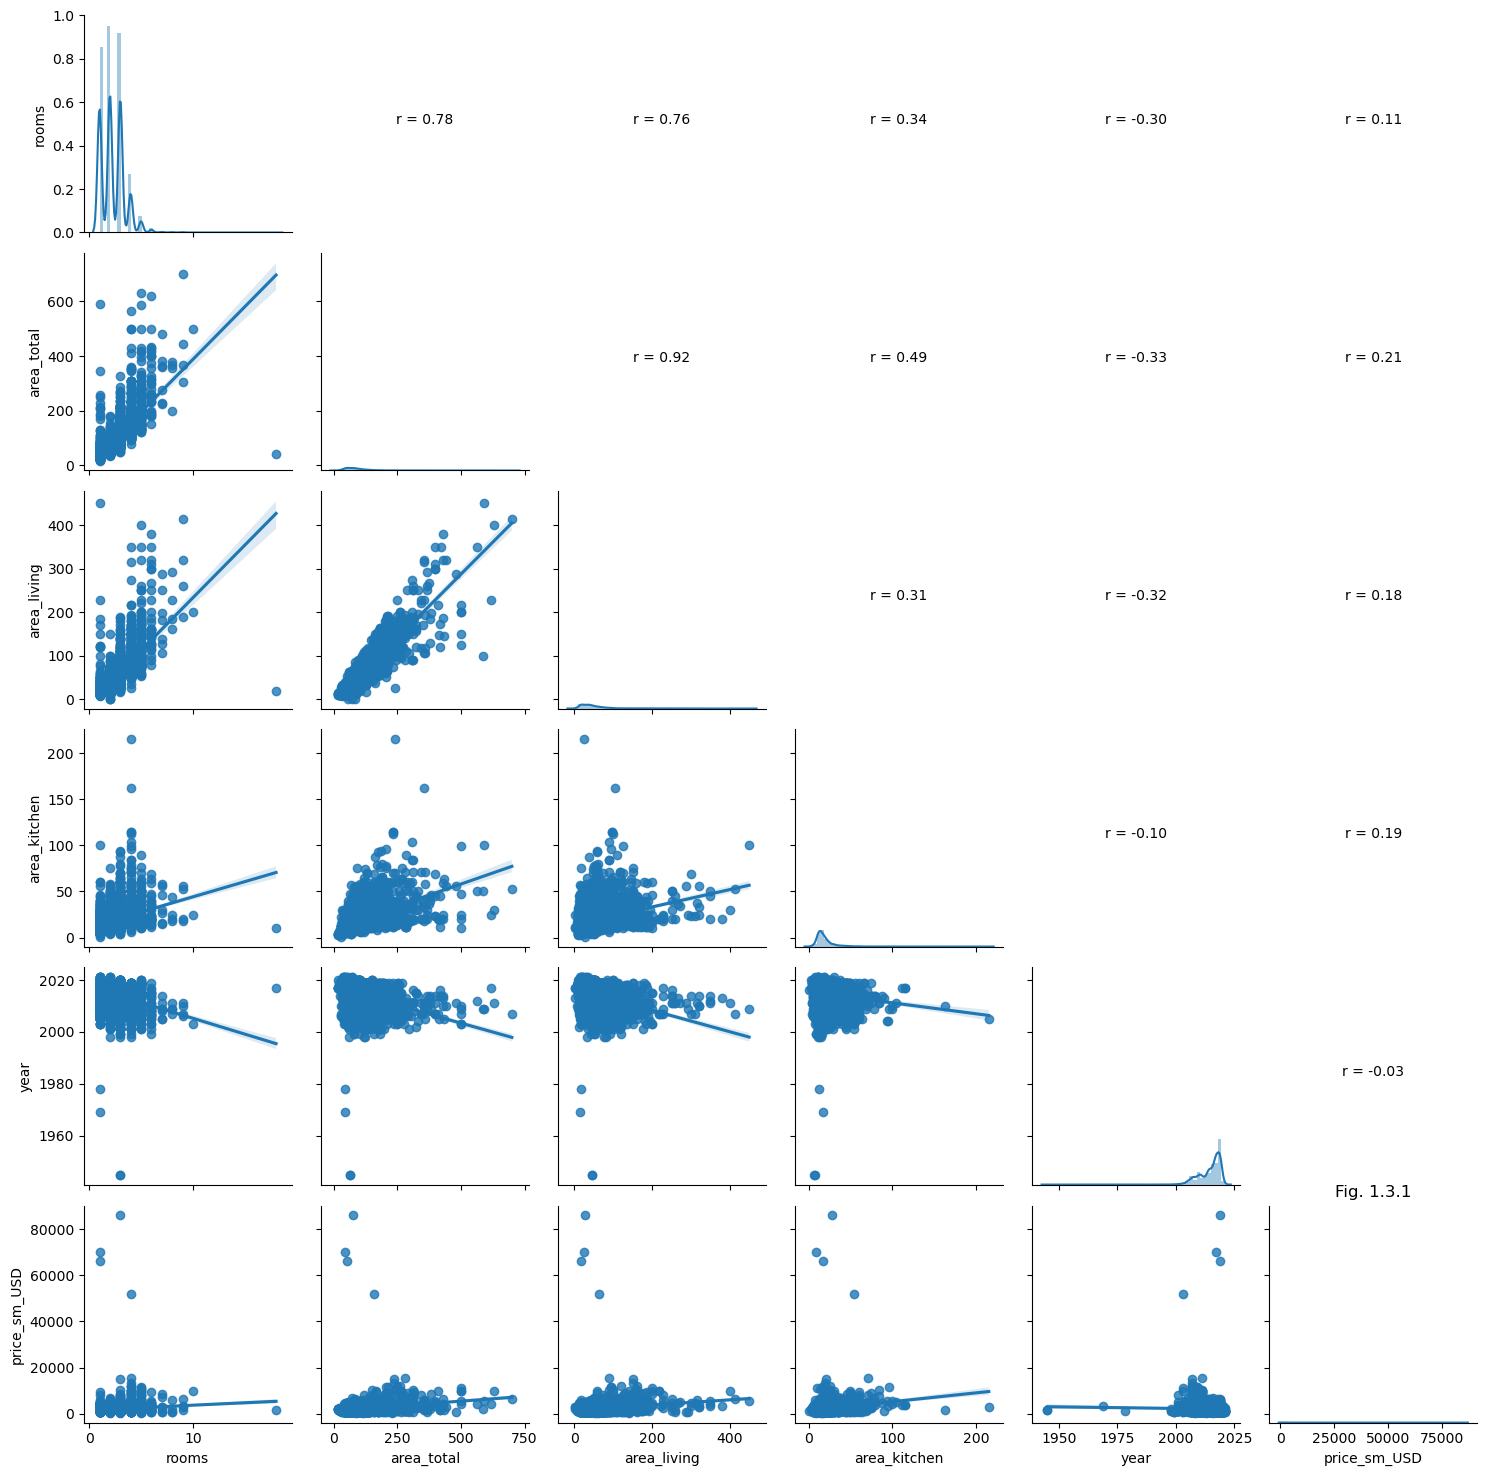

In [62]:
g = sns.PairGrid(df_Full_Complex[['rooms', 'area_total', 'area_living', 'area_kitchen', 'year', 'price_sm_USD']])
plt.title('Fig. 1.3.1')
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef);



**Після аналізу коефіцієнтів кореляції Пірсона умову відсутності мультиколінеарості більш-менш задовільняють такі предиктори, як `'area_total'`, `'price_sm_USD'` (див. знизу -  Fig. 1.3.2).**

 

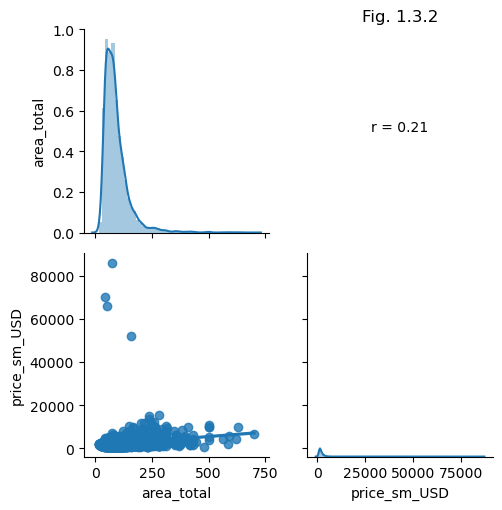

In [63]:
g = sns.PairGrid(df_Full_Complex[['area_total', 'price_sm_USD']])

g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)
plt.title('Fig. 1.3.2');

>Будуємо нову лінійну модель **"Model"**, де придикторами виступатимуть лише дві змінні - `'area_total'` та `'price_sm_USD'`.

In [64]:
#define predictor and response variables
X = df_Full_Complex[['area_total', 'price_sm_USD']]
y = df_Full_Complex['housing_class_by_complex']

#Fit the LDA model
Model = LinearDiscriminantAnalysis()
Model.fit(X, y)

LinearDiscriminantAnalysis()

$y_i=intercept_i + b1_i*X1_i + b2_i*X2_i$ **(формула 1.3.2)**

In [65]:
print(f'''

За результатами дискримінантного аналізу побудовано чотири функції класифікації {Model.classes_} 
на основі трансформованого набору даних (з df_Full_Complex), що містив заздалегідь визначені класи житла 'housing_class_by_complex' 
та 2 змінних {Model.feature_names_in_}.
Таким чином, було знайдено невідомі параметри правої частини формули 1.3.2 (див. вище).

Коєфіцієнти біля X1 та X2 для класифікаційної функції житла БІЗНЕС-КЛАСУ(𝑦𝑖, 𝑖=1): 
{Model.coef_[0]}, а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): {Model.intercept_[0]}

Коєфіцієнти біля X1 та X2 для класифікаційної функції житла ЕКОНОМ-КЛАСУ(𝑦𝑖, 𝑖=2): 
{Model.coef_[1]}, а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): {Model.intercept_[1]}

Коєфіцієнти біля X1 та X2 для класифікаційної функції житла КОМФОРТ-КЛАСУ(𝑦𝑖, 𝑖=3): 
{Model.coef_[2]}, а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): {Model.intercept_[2]}

Коєфіцієнти біля X1 та X2 для класифікаційної функції житла ПРЕМІУМ-КЛАСУ(𝑦𝑖, 𝑖=4): 
{Model.coef_[3]}, а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): {Model.intercept_[3]}

''')



За результатами дискримінантного аналізу побудовано чотири функції класифікації ['бізнес-клас' 'економ-клас' 'комфорт-клас' 'преміум-клас'] 
на основі трансформованого набору даних (з df_Full_Complex), що містив заздалегідь визначені класи житла 'housing_class_by_complex' 
та 2 змінних ['area_total' 'price_sm_USD'].
Таким чином, було знайдено невідомі параметри правої частини формули 1.3.2 (див. вище).

Коєфіцієнти біля X1 та X2 для класифікаційної функції житла БІЗНЕС-КЛАСУ(𝑦𝑖, 𝑖=1): 
[-1.43675967e-03 -1.80760745e-05], а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): -0.9666859877120951

Коєфіцієнти біля X1 та X2 для класифікаційної функції житла ЕКОНОМ-КЛАСУ(𝑦𝑖, 𝑖=2): 
[-0.00403852 -0.00026173], а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): -1.33741657643655

Коєфіцієнти біля X1 та X2 для класифікаційної функції житла КОМФОРТ-КЛАСУ(𝑦𝑖, 𝑖=3): 
[-0.00422812 -0.00016955], а константа(𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡): -0.5569704203881582

Коєфіцієнти біля X1 та X2 для класифікаційної функції житла ПРЕМІУМ-КЛАСУ(𝑦𝑖, 𝑖=4): 
[0.00873067 0.00034867], а конс

In [66]:
print(Model.classes_)
print(Model.priors_)

['бізнес-клас' 'економ-клас' 'комфорт-клас' 'преміум-клас']
[0.32242489 0.12410587 0.29846209 0.25500715]


In [67]:
print(Model.decision_function(X))

[[-1.06012546 -1.88564941 -0.98948985 -2.37697664]
 [-1.05677379 -1.92094382 -1.00429373 -2.34671091]
 [-1.2029606  -2.26056165 -1.39516643 -1.53911195]
 ...
 [-1.04749143 -1.76977578 -0.90797908 -2.54474447]
 [-1.08787637 -2.00246276 -1.09256492 -2.16439905]
 [-1.08830145 -2.02538254 -1.10580039 -2.13721621]]


In [68]:
print(Model.get_params())

{'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}


score(X, y, sample_weight=None)
Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [69]:
# Дізнаємось скльки відсотків даних модель прокласифікувала коректно?
print(Model.score(X, y))

0.5277181688125894


Зобимо перевірку того як прогнозується (`Model.predict(X)`) певний клас житлового об'єкта за допомогою лінійних класифікаційних функцій (позиція в `Model.classes_` відповідає позиції у `Model.decision_function`) моделі **"Model"**. Певний об'єкт житлової нерухомості може бути віднесеним до 1 з 4 класів за найбільшим значенням 1 з 4 класифікаційних функцій. Бачимо, що виводиться класи перших трьох та останніх трьох житлових об'єктів у досліджуваному датафреймі.

In [70]:
print(Model.classes_);

print(Model.decision_function(
    df_Full_Complex[['area_total', 'price_sm_USD']]));

print(Model.predict(X));

['бізнес-клас' 'економ-клас' 'комфорт-клас' 'преміум-клас']
[[-1.06012546 -1.88564941 -0.98948985 -2.37697664]
 [-1.05677379 -1.92094382 -1.00429373 -2.34671091]
 [-1.2029606  -2.26056165 -1.39516643 -1.53911195]
 ...
 [-1.04749143 -1.76977578 -0.90797908 -2.54474447]
 [-1.08787637 -2.00246276 -1.09256492 -2.16439905]
 [-1.08830145 -2.02538254 -1.10580039 -2.13721621]]
['комфорт-клас' 'комфорт-клас' 'бізнес-клас' ... 'комфорт-клас'
 'бізнес-клас' 'бізнес-клас']


In [71]:
NEW_CLASS = df_All_Housing[['area_total', 'price_sm_USD']]
NEW_CLASS

,area_total,price_sm_USD
0,75.00,839
1,62.21,820
2,48.00,1354
3,43.00,1566
4,149.00,1228
...,...,...
13901,60.00,2000
13902,102.00,2353
13904,53.00,2358
13905,358.00,1397


In [72]:
print(Model.predict(NEW_CLASS))

['комфорт-клас' 'комфорт-клас' 'комфорт-клас' ... 'бізнес-клас'
 'преміум-клас' 'преміум-клас']


In [73]:
df_All_Housing['Model_predicted_housing_class'] = Model.predict(NEW_CLASS)

In [74]:
df_All_Housing

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,year,wall,project,price_USD,price_sm_USD,mean_complex_sm_USD,housing_class_by_complex,model_predicted_housing_class,Model_predicted_housing_class
0,None,None,Голосіївський,Київ,3,75.00,40.0,13.0,2021.0,монолітно-каркасний,спец. проект,62900,839,NaN,None,бізнес-клас,комфорт-клас
1,None,None,Голосіївський,Київ,2,62.21,29.0,12.4,2021.0,монолітно-каркасний,спец. проект,51000,820,NaN,None,бізнес-клас,комфорт-клас
2,ЖК West House,Деміївка,Голосіївський,Київ,1,48.00,15.0,12.0,2021.0,цегляний будинок,спец. проект,65000,1354,1354.0,комфорт-клас,бізнес-клас,комфорт-клас
3,"ЖК Метрополіс (вул. Академіка Заболотного, 1)",Теремки-1,Голосіївський,Київ,1,43.00,13.0,19.0,2020.0,None,None,67350,1566,1322.0,комфорт-клас,бізнес-клас,комфорт-клас
4,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.00,83.9,29.6,2020.0,монолітно-каркасний,спец. проект,183080,1228,1979.0,бізнес-клас,преміум-клас,бізнес-клас
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13901,None,Історичний центр,Шевченківський,Київ,2,60.00,34.1,9.8,1870.0,цегляний будинок,дореволюційний,120000,2000,NaN,None,комфорт-клас,бізнес-клас
13902,None,Старий Київ,Шевченківський,Київ,3,102.00,35.0,24.0,1863.0,цегляний будинок,дореволюційний,240000,2353,NaN,None,комфорт-клас,бізнес-клас
13904,None,Історичний центр,Шевченківський,Київ,2,53.00,42.0,5.0,1860.0,цегляний будинок,дореволюційний,125000,2358,NaN,None,комфорт-клас,бізнес-клас
13905,None,Історичний центр,Шевченківський,Київ,6,358.00,290.0,20.0,1860.0,цегляний будинок,дореволюційний,500000,1397,NaN,None,економ-клас,преміум-клас


In [75]:
df_All_Housing.Model_predicted_housing_class.value_counts()

комфорт-клас    4781
бізнес-клас     4461
преміум-клас    1051
Name: Model_predicted_housing_class, dtype: int64

>Таким чином, результати прогнозної класифікації для 10293 житлових об'єктів(див. вище col 'Model_predicted_housing_class' in `df_All_Housing`) за допомогою емпіричної моделі **"Model"**, що була побудована на базі даних про класи 5592 житлових об'єктів у резиденських комплексах(`df_Full_Complex`), вказують на те, що найчисельнішим є група житлових об'єктів `комфорт-класу` (**всього - 4781**), далі йде житло `бізнес- та преміум-класу` (**4461 та 1051 відповідно**). Цікавим є те, що є житло `економ-класу` у даній моделі **"Model"** склало **нуль об'єктів вторинної житлової нерухомості**, натомість у моделі **"model"** таких об'єктів було **13**. Не дивлячись на відсутність житла `економ-класу` у моделі **"Model"**, її коректність класифікації даних є більшою, аніж у моделі **"model"** (**Model.score(X, y) = 0.528** проти **model.score(X, y) = 0.499**). Отже, модель **"Model"** коректно класифікує **53%** даних. З огляду на вищеописане, автор схиляється до більш-менш "практичного" використання моделі **"Model"**, аніж моделі **"model"**. Хоча у обраній автором моделі й утворилось три прогнозованих класи, проте `комфорт-клас` можна трактувати як умовне поєднання `економ-класу` (класу пониженої комфортності) та `комфорт-класу` (класу підвищеної комфортності), тому позначимо цю умовність через подвійні лапки - `"комфорт-клас"`.







In [76]:
df_All_Housing['Model_predicted_housing_class'] = df_All_Housing['Model_predicted_housing_class'].replace(['комфорт-клас'], '"комфорт-клас"')

In [77]:
df_All_Housing.Model_predicted_housing_class.value_counts()

"комфорт-клас"    4781
бізнес-клас       4461
преміум-клас      1051
Name: Model_predicted_housing_class, dtype: int64

**Головними лімітуючими чинниками побудови двох лінійних моделей були:**
    
- відсуть достатньої інформації з опису даних (особливо не відомо станом на яку дату було зібрано дані) від дослідника, що розмістив дані у сфоєму профілі на [Kaggle](https://www.kaggle.com/datasets/kirichenko17roman/kyiv-real-estate), які він попередньо напарсив з сайту [`Flatfy`](https://flatfy.ua/uk);
- значна частина даних мала суттєві інформаційні прогалини: кінцевий датафрейм `df_All_Housing` містив лише **10 тис.** об'єктів вторинної житлової нерухомості, що на майже **4 тис.** об'єктів менше, ніж було у початковому датафреймі `df_real_estate`;
- відносно високий степінь гетерогенності даних, особливо щодо року побудови ('year'), типів будинків ('project'), типів стін ('wall').

**ВИСНОВОК.** За допомогою використання **PandasSQL** та здійснення **лінійного дискримінантного аналізу** було розроблемо класифікацію житлових об'єктів вторинного ринку нерухомості в м.Київ. Дане дослідження було вмотивоване відсутністю аналогічної класифікації вторинного житла. На мою думку, емпірично виведені класи житла (***як додатковий критерій вибору житла***) допоможуть клієнтам сайту [`Flatfy`](https://flatfy.ua/uk/search?geo_id=1&section_id=1) (**див. знизу fig. 1.3.3**) швидше знайти собі бажане житло, що в результаті покращить якість життя міських мешканців шляхом задоволення їхніх потреб у бажаному середовищі проживання.



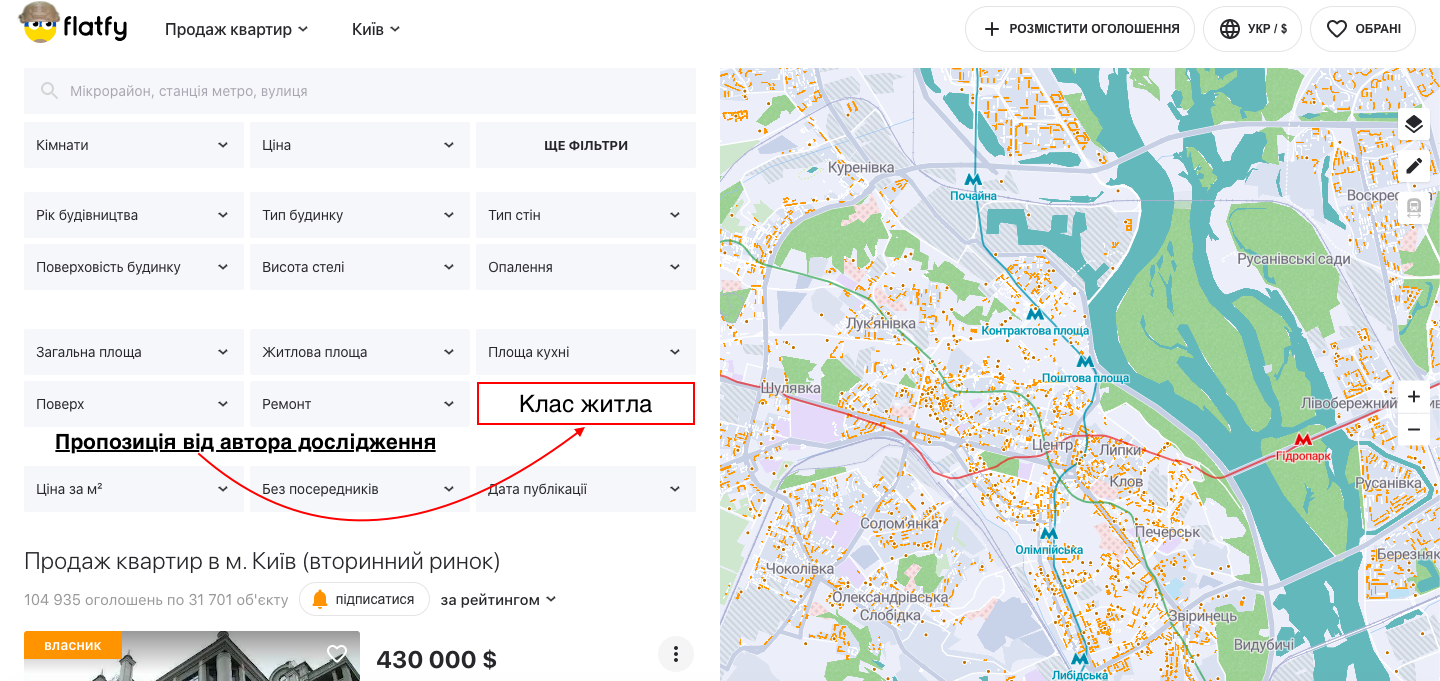

**Fig. 1.3.3.** Дослідницька пропозиція, що мала б позитивний бізнес-ефект 
(**Source:** [https://flatfy.ua/uk/search?geo_id=1&section_id=1])

# АНАЛІЗ "ВТОРИННОГО" РИНКУ ЖИТЛОВОЇ НЕРУХОМОСТІ В М.КИЇВ: коротка характеристика

In [78]:
df_All_Housing.describe()

,rooms,area_total,area_living,area_kitchen,year,price_USD,price_sm_USD,mean_complex_sm_USD
count,10293.000000,10293.000000,10293.000000,10293.000000,10293.000000,1.029300e+04,10293.000000,5592.000000
mean,2.386088,83.743729,44.971714,15.496796,1997.597008,1.730292e+05,1802.321675,2078.963162
std,1.111789,53.475604,32.368989,10.264460,25.915481,2.960104e+05,1716.189914,1041.917143
min,1.000000,13.000000,1.000000,1.000000,1858.000000,1.544200e+04,125.000000,511.000000
25%,2.000000,51.000000,25.000000,9.000000,1984.000000,6.500000e+04,1108.000000,1333.000000
50%,2.000000,71.000000,39.000000,13.000000,2008.000000,9.800000e+04,1453.000000,1762.000000
75%,3.000000,97.000000,54.000000,18.300000,2017.000000,1.750000e+05,2072.000000,2544.000000
max,18.000000,1000.000000,450.000000,215.000000,2022.000000,8.134500e+06,86000.000000,8444.000000


In [79]:
df_All_Housing.Model_predicted_housing_class.value_counts()

"комфорт-клас"    4781
бізнес-клас       4461
преміум-клас      1051
Name: Model_predicted_housing_class, dtype: int64

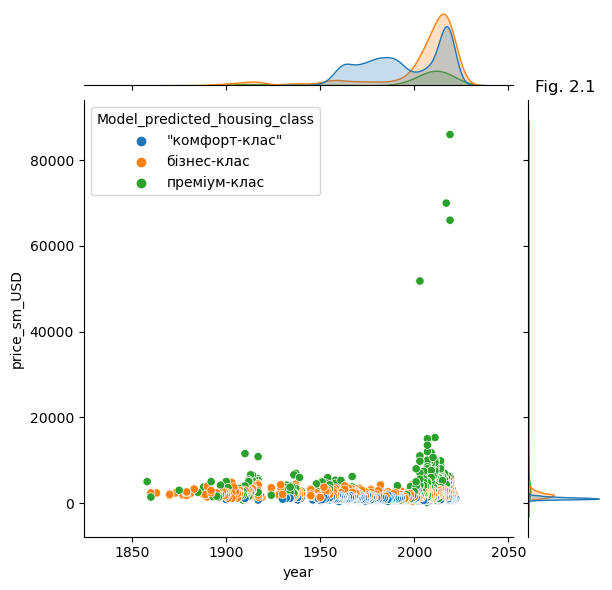

In [80]:
sns.jointplot(data=df_All_Housing, x="year", y="price_sm_USD", hue="Model_predicted_housing_class")
plt.title("Fig. 2.1");

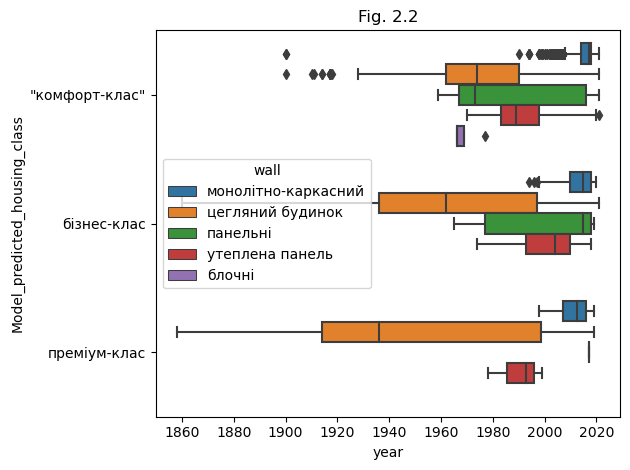

In [81]:
# Треба там де проджект вставити клас
sns.boxplot(data=df_All_Housing, 
            x="year", 
            y="Model_predicted_housing_class", 
            hue="wall")
plt.title('Fig. 2.2')
plt.tight_layout();

admin_district,Голосіївський,Дарницький,Деснянський,Дніпровський,Оболонський,Печерський,Подільський,Святошинський,Солом'янський,Шевченківський
Model_predicted_housing_class,,,,,,,,,,
"""комфорт-клас""",451,846,536,656,422,94,518,477,466,315
бізнес-клас,731,636,54,302,210,1230,250,124,364,560
преміум-клас,91,28,2,19,54,613,24,3,45,172


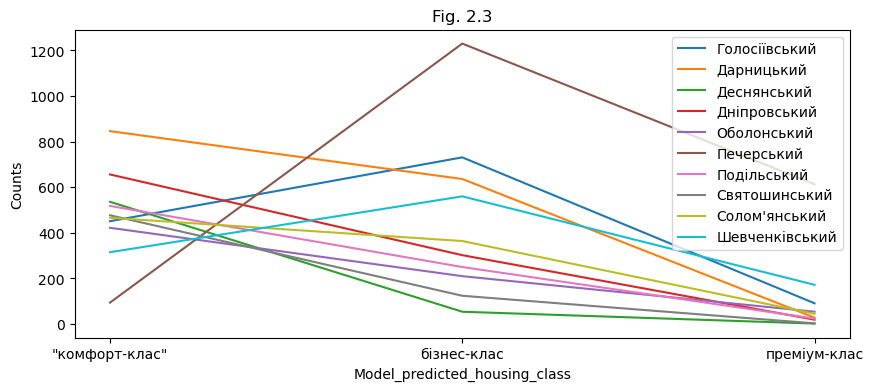

In [82]:
plt.figure(figsize=(10, 4))
borough_pivot_districts_1 = df_All_Housing.pivot_table(index='Model_predicted_housing_class', 
                                             columns='admin_district', 
                                             values='price_sm_USD',  
                                             aggfunc='size')
display(borough_pivot_districts_1.style.background_gradient(axis=0))
plt.plot(borough_pivot_districts_1)
plt.legend(borough_pivot_districts_1)
plt.xlabel('Model_predicted_housing_class')
plt.ylabel('Counts')
plt.title('Fig. 2.3');

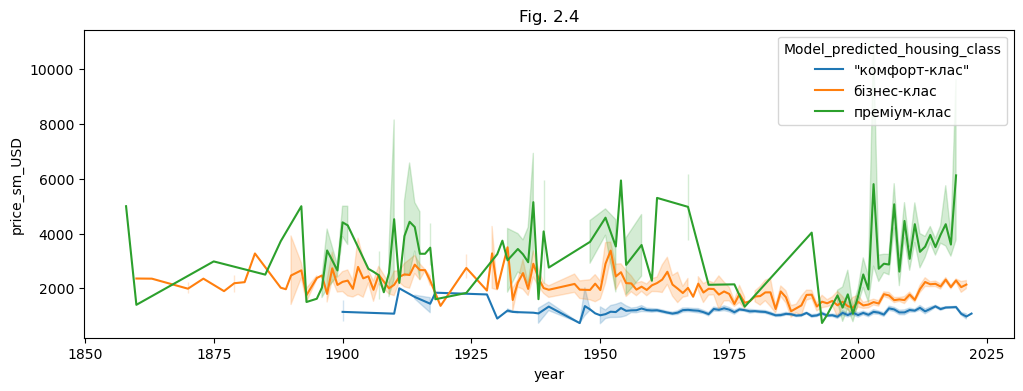

In [83]:
plt.figure(figsize=(12, 4))
sns.lineplot(data = df_All_Housing, 
             x="year", 
             y="price_sm_USD", 
             hue="Model_predicted_housing_class")
plt.title('Fig. 2.4');

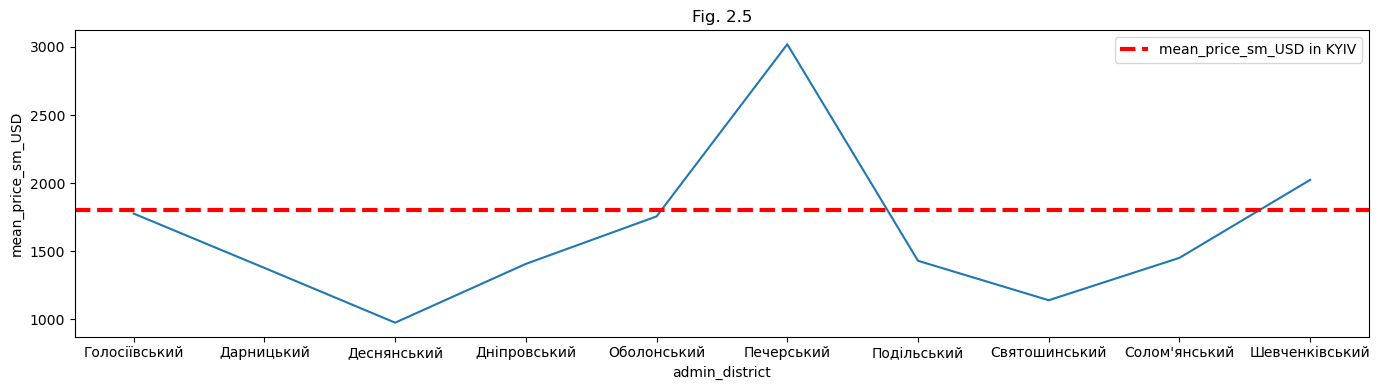

In [84]:
plt.figure(figsize=(14, 4))
plt.plot(df_All_Housing.groupby('admin_district')['price_sm_USD'].mean())
plt.title("Fig. 2.5")
plt.xlabel("admin_district")
plt.ylabel("mean_price_sm_USD")
plt.axhline(y = np.nanmean(df_All_Housing.price_sm_USD), color='red', linestyle='--', linewidth=3, label='mean_price_sm_USD in KYIV')
plt.legend()
plt.tight_layout();

In [85]:
np.nanmean(df_All_Housing.price_sm_USD)

1802.321674924706

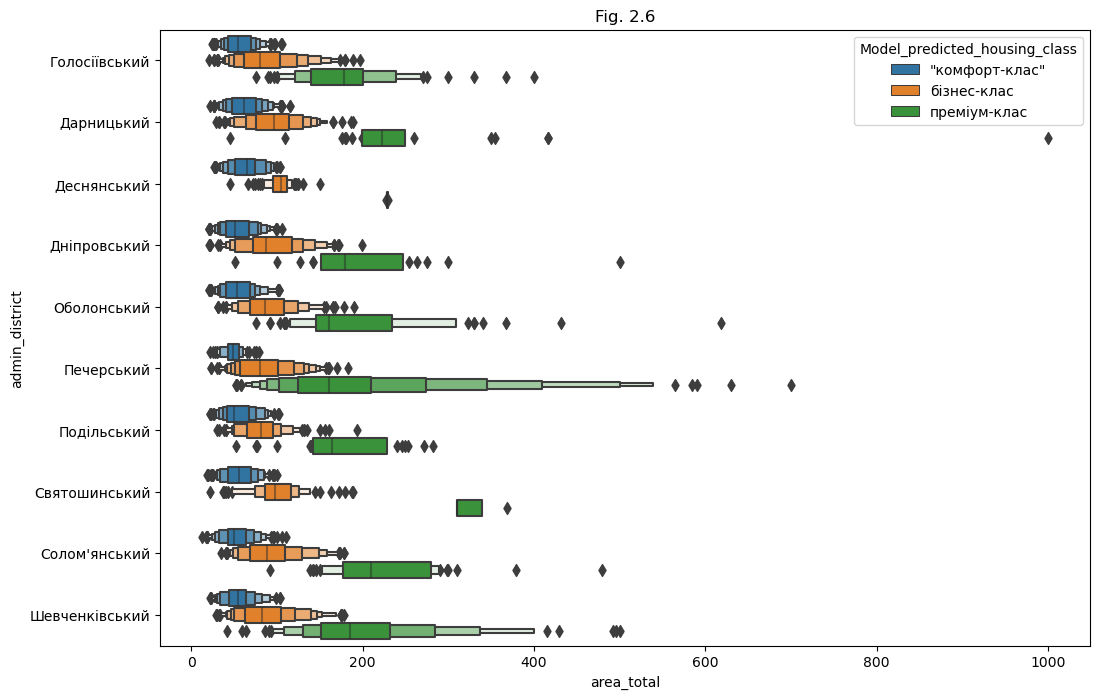

In [86]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df_All_Housing, 
              x="area_total", 
              y="admin_district", 
              hue="Model_predicted_housing_class", 
              scale="linear")
plt.title('Fig. 2.6');

**МОЖНА ЗРОБИТИ ТАКІ ВИСНОВКИ:**
- житло `"комфорт-класу"` у Києві забудовувалось у два етами: **(1)** соціалістичний етап та **(2)** пост-соціалістичний. Для першого етапу характерне **житло пониженої комфортності** (хрущівки, брежнєвки тощо - визначено за роком будівництва (*див. Fig. 2.1*)). На противагу цьому, будівництво **житла підвищеної комфортності** притаманне пост-соціалістичному етапу.
- найбільші хвилі будівництва житла `бізнес-` та `преміум-класу` в столиці припадають на пост-1991 період, що є індикатором **комодифікації житла** й переходом до **капіталізму** в незалежній Україні.
- ринок вторинного житла в Києві характеризуються **чітким звуженням спектру типів стін будинків із зростанням рангу житла** (*див. Fig. 2.2*). Тобто, житло `"комфорт-класу"` налічує 5 різновидів будівельних матеріалів (цегляний будинок, блочний, панельний, утеплена панель та монолітно-каркасний будинок), `бізнес-` та `преміум-класу` - 4 та 3 відповідно.
- пропозиція житла на вторинному ринку праці є **нерівномірною** (*див. Fig. 2.3*). Так, серед усіх 10 районів Києва житло `преміум-класу` переважно **концентрується** у Печерському районі, також значне **зосередження** даного класу житла спостерігається у Шевченківському та Голосієвському районах. Загалом, **переважння** к-ті пропозицій житла `бізнес-класу` над к-тю пропозицій житла інших класів притаманно лише трьом районам - Печерському, Голосієвському та Шевченківському. У всіх інших районах столиці прослідковується **переважння** к-ті пропозицій житла `"комфорт-класу"` над к-тю пропозицій житла інших класів. **Найбільше** пропозицій житла `"комфорт-класу"` спостерігається у Данрницькому районі, **найменше** - у Печерському.	 
- не є неочікуваним те, що квадратний метр житла `"комфорт-класу"` є **найдешевшим** на міському ринку вторинного житла, а кв.метр житла `преміум-класу` - **найдорожчим** (*див. Fig. 2.4*). **Буферною ціновою ланкою** є житло `бізнес-класу`. Однак, такий розподіл середньої ціни кв.метру за класами різниця між районами (*див.  рис. знизу*). Найбільша цінова **поляризація** між різними класами житла спостерігається у Дарницькому, Дніпровському та Оболонському районах. Загалом, **найдорожча** вторинна житлова нерухомість у Києві розташована у Печерському та Шевченківському районах, а **найдешевша** - у Деснянському районі (*див. Fig. 2.5*). 
- як правило, абсолютно всім районам столиці притаманно те, що зі **зростанням** рангу житла прослідковується **зростання** розміру середньої площі житла (*див. Fig. 2.6*).


>ОТЖЕ, З ВИЩЕОПИСАНИХ ОСОБЛИВОСТЕЙ ФУНКЦІОНУВАННЯ РИНКУ ВТОРИННОЇ ЖИТЛОВОЇ НЕРУХОМОСТІ В М.КИЇВ СЛІДУЄ, ЩО ПОДІЛ ЖИТЛА НА КЛАСИ ДОПОМОЖЕ КРАЩЕ УСВІДОМИТИ РЕЗИДЕНТСЬКИЙ РОЗВИТОК СТОЛИЦІ Й, НА ПЕРСПЕКТИВУ, СЛУГУВАТИМЕ ВАЖЛИВИМ КРИТЕРІЄМ ВИБОРУ ЖИТЛА ДЛЯ БАГАТЬОХ МЕШКАНЦІВ МІСТА-МІЛЬЙОННИКА.



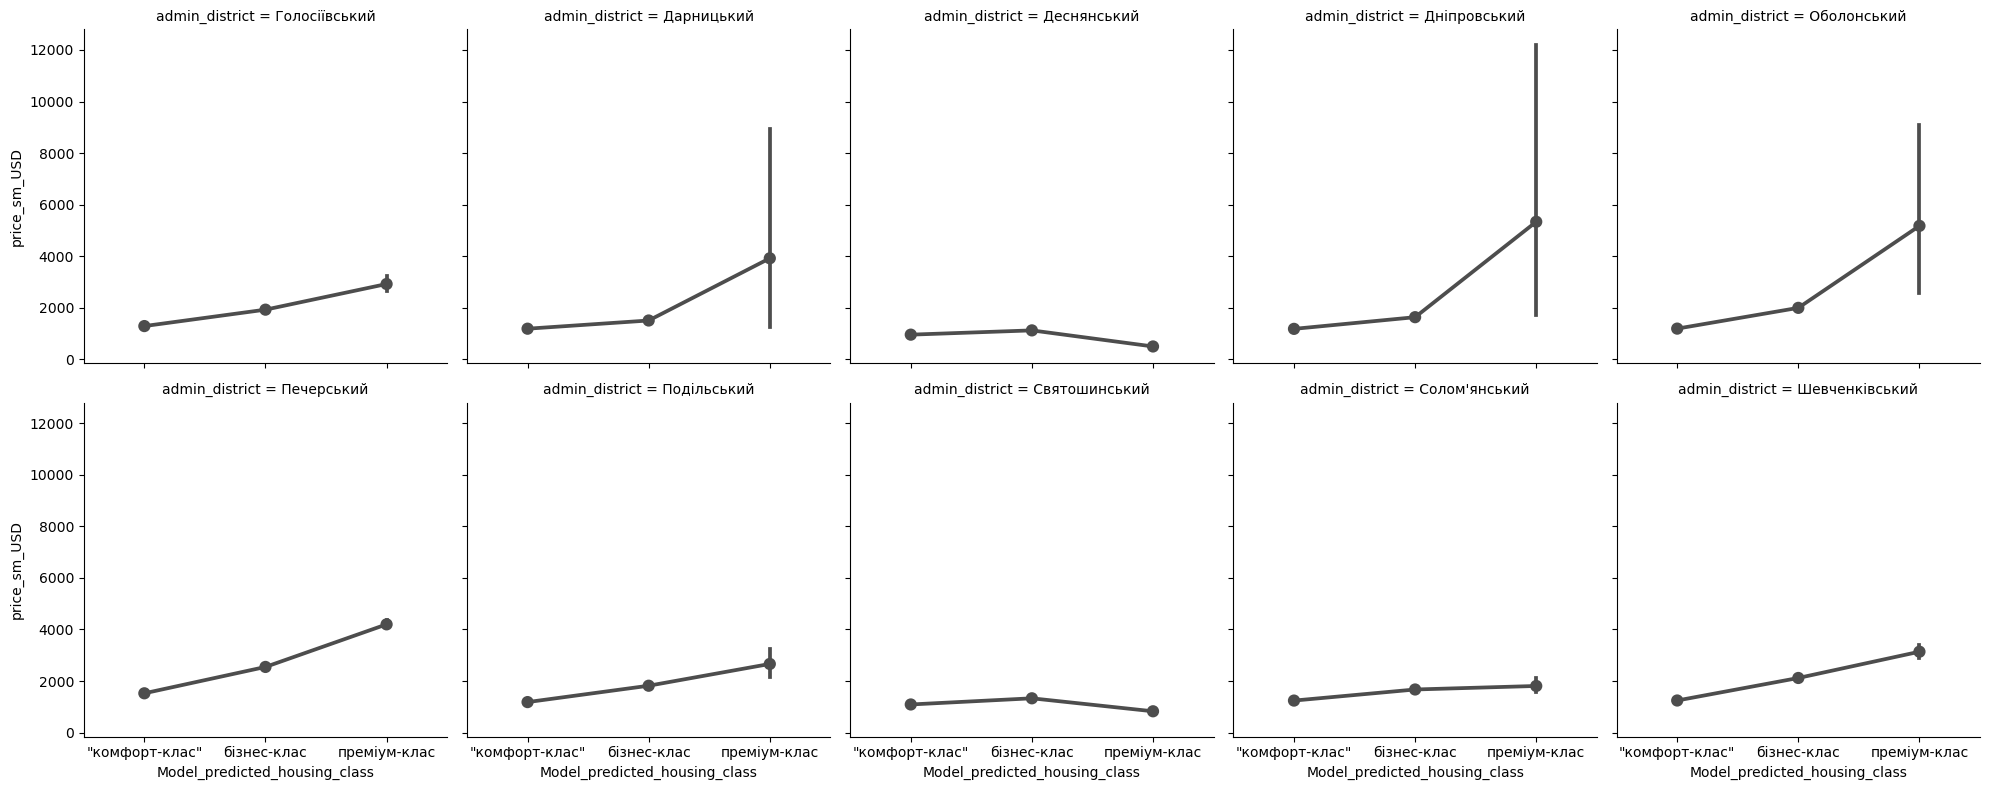

In [87]:
g = sns.FacetGrid(df_All_Housing, col="admin_district", col_wrap=5, height=4)
g.map(sns.pointplot, "Model_predicted_housing_class", "price_sm_USD", 
      order=['"комфорт-клас"', "бізнес-клас", "преміум-клас"], color=".3", errorbar=None);

In [88]:
df_All_Housing

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,year,wall,project,price_USD,price_sm_USD,mean_complex_sm_USD,housing_class_by_complex,model_predicted_housing_class,Model_predicted_housing_class
0,None,None,Голосіївський,Київ,3,75.00,40.0,13.0,2021.0,монолітно-каркасний,спец. проект,62900,839,NaN,None,бізнес-клас,"""комфорт-клас"""
1,None,None,Голосіївський,Київ,2,62.21,29.0,12.4,2021.0,монолітно-каркасний,спец. проект,51000,820,NaN,None,бізнес-клас,"""комфорт-клас"""
2,ЖК West House,Деміївка,Голосіївський,Київ,1,48.00,15.0,12.0,2021.0,цегляний будинок,спец. проект,65000,1354,1354.0,комфорт-клас,бізнес-клас,"""комфорт-клас"""
3,"ЖК Метрополіс (вул. Академіка Заболотного, 1)",Теремки-1,Голосіївський,Київ,1,43.00,13.0,19.0,2020.0,None,None,67350,1566,1322.0,комфорт-клас,бізнес-клас,"""комфорт-клас"""
4,ЖК Respublika,Теремки,Голосіївський,Київ,5,149.00,83.9,29.6,2020.0,монолітно-каркасний,спец. проект,183080,1228,1979.0,бізнес-клас,преміум-клас,бізнес-клас
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13901,None,Історичний центр,Шевченківський,Київ,2,60.00,34.1,9.8,1870.0,цегляний будинок,дореволюційний,120000,2000,NaN,None,комфорт-клас,бізнес-клас
13902,None,Старий Київ,Шевченківський,Київ,3,102.00,35.0,24.0,1863.0,цегляний будинок,дореволюційний,240000,2353,NaN,None,комфорт-клас,бізнес-клас
13904,None,Історичний центр,Шевченківський,Київ,2,53.00,42.0,5.0,1860.0,цегляний будинок,дореволюційний,125000,2358,NaN,None,комфорт-клас,бізнес-клас
13905,None,Історичний центр,Шевченківський,Київ,6,358.00,290.0,20.0,1860.0,цегляний будинок,дореволюційний,500000,1397,NaN,None,економ-клас,преміум-клас
